<a href="https://colab.research.google.com/github/swati570/dotkonnekt/blob/main/week2_assg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install transformers
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [26]:
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import logging

In [27]:
logging.basicConfig(level=logging.INFO)

In [28]:
MODEL_NAME = "distilbert-base-uncased-finetuned-sst-2-english"

try:
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
    logging.info("Model loaded successfully.")
except Exception as e:
    logging.error(f"Error loading model: {e}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [29]:
device = 0 if torch.cuda.is_available() else -1


In [30]:
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device)


Device set to use cpu


In [31]:
texts = [
    "I love learning Python!",
    "This assignment is tough but interesting.",
    "I'm feeling anxious about my exam.",
    "this workshop is very challenging."
]

results = nlp(texts)

for i, res in enumerate(results):
    print(f"Text: {texts[i]}")
    print(f"→ Sentiment: {res['label']} | Score: {res['score']:.4f}")


Text: I love learning Python!
→ Sentiment: POSITIVE | Score: 0.9996
Text: This assignment is tough but interesting.
→ Sentiment: POSITIVE | Score: 0.9726
Text: I'm feeling anxious about my exam.
→ Sentiment: NEGATIVE | Score: 0.9980
Text: this workshop is very challenging.
→ Sentiment: POSITIVE | Score: 0.9989


que.2.2. Prompt Optimization Framework
Develop a framework that automatically adapts prompts for: - Summarization - Text classification - Creative text generation
The framework should detect the task type and adjust prompt style, length, and structure
accordingly

In [32]:
# Step 1: Task Detection
def detect_task(input_text):
    input_text = input_text.lower()
    if "summarize" in input_text:
        return "summarization"
    elif "classify" in input_text or "label" in input_text:
        return "classification"
    elif any(word in input_text for word in ["story", "write", "generate", "imagine"]):
        return "creative_generation"
    else:
        return "unknown"

# Step 2: Prompt Templates
PROMPT_TEMPLATES = {
    "summarization": lambda text: f"Summarize this clearly and concisely:\n{text}",
    "classification": lambda text: f"Classify the sentiment or topic of this text:\n{text}",
    "creative_generation": lambda text: f"Write a creative continuation of the following:\n{text}"
}

# Step 3: Prompt Adapter
def adapt_prompt(task_type, input_text, style="default", length="medium"):
    base_prompt = PROMPT_TEMPLATES.get(task_type, lambda x: x)(input_text)
    if style == "formal":
        base_prompt = "Please respond in a formal tone.\n" + base_prompt
    elif style == "playful":
        base_prompt = "Add a touch of humor and creativity.\n" + base_prompt
    if length == "short":
        base_prompt += "\nLimit your response to 2-3 sentences."
    elif length == "long":
        base_prompt += "\nExpand with detailed reasoning or narrative."
    return base_prompt

# Step 4: Run it
input_text = "Write a story about a robot who learns to dream."
task = detect_task(input_text)
prompt = adapt_prompt(task, input_text, style="playful", length="long")

print("Detected Task:", task)
print("Final Prompt:\n", prompt)


Detected Task: creative_generation
Final Prompt:
 Add a touch of humor and creativity.
Write a creative continuation of the following:
Write a story about a robot who learns to dream.
Expand with detailed reasoning or narrative.


q3. Automated Data Exploration with pandas
Create a reusable function or class that: - Generates statistical summaries for each column - Detects and reports missing values, duplicates, and outliers - Recommends preprocessing steps - Outputs a well-structured report


In [33]:
import pandas as pd
import numpy as np

class DataExplorer:
    """
    A reusable class for automated data exploration using pandas.
    Provides statistical summaries, detects data issues, and recommends preprocessing steps.
    """

    def __init__(self, dataframe):
        self.df = dataframe.copy()
        self.report = {}

    def generate_summary(self):
        """Generates statistical summary for each column."""
        self.report['summary'] = self.df.describe(include='all').transpose()

    def detect_missing_values(self):
        """Detects missing values and calculates percentage."""
        missing_count = self.df.isnull().sum()
        missing_percent = (missing_count / len(self.df)) * 100
        self.report['missing_values'] = pd.DataFrame({
            'Missing Count': missing_count,
            'Missing %': missing_percent.round(2)
        })

    def detect_duplicates(self):
        """Detects duplicate rows in the dataset."""
        duplicate_count = self.df.duplicated().sum()
        self.report['duplicates'] = f"{duplicate_count} duplicate rows found."

    def detect_outliers(self):
        """Detects outliers in numeric columns using IQR method."""
        outlier_summary = {}
        numeric_cols = self.df.select_dtypes(include=np.number).columns
        for col in numeric_cols:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)]
            outlier_summary[col] = {
                'Outlier Count': outliers.shape[0],
                'Outlier Indices': outliers.index.tolist()
            }
        self.report['outliers'] = outlier_summary

    def recommend_preprocessing(self):
        """Suggests preprocessing steps based on data issues."""
        recommendations = []
        if self.df.isnull().sum().any():
            recommendations.append("🔧 Handle missing values: imputation or removal.")
        if self.df.duplicated().any():
            recommendations.append("🧹 Remove duplicate rows.")
        for col in self.df.select_dtypes(include=np.number).columns:
            skewness = self.df[col].skew()
            if abs(skewness) > 1:
                recommendations.append(f"📊 Column '{col}' is highly skewed (skew={skewness:.2f}). Consider transformation.")
        self.report['recommendations'] = recommendations

    def generate_report(self):
        """Runs all analysis methods and returns a structured report."""
        self.generate_summary()
        self.detect_missing_values()
        self.detect_duplicates()
        self.detect_outliers()
        self.recommend_preprocessing()
        return self.report


In [35]:
# Load your dataset
df = pd.read_csv("/content/hospital.csv")

# Create an instance and generate report
explorer = DataExplorer(df)
report = explorer.generate_report()

# View sections of the report
print("Summary:\n", report['summary'])
print("Missing Values:\n", report['missing_values'])
print("Duplicates:\n", report['duplicates'])
print("Outliers:\n", report['outliers'])
print("Recommendations:\n", report['recommendations'])


Summary:
                       count unique                                   top  \
Admission_ID          40235  40235  a129b050-2edc-444b-9036-fc1886798172   
Name                  40235  40235                          Tony Collins   
Age                 40235.0    NaN                                   NaN   
Gender                40235      2                                Female   
BMI                 40235.0    NaN                                   NaN   
Ethnicity             40235      5                             Caucasian   
Height              40235.0    NaN                                   NaN   
Weight              40235.0    NaN                                   NaN   
Blood_Type            40235      8                                   AB+   
Medical_Condition     40235      6                             Arthritis   
Admission_Date        40235   1827                            2020-10-22   
Doctor                40235  33556                            John Smith   
Ho

4. Multi-Panel Visualization Dashboard
Build a dashboard using matplotlib and seaborn that: - Supports different data types - Automatically selects suitable chart types - Displays multiple panels for comparison - Includes legends, titles, and annotations for clar


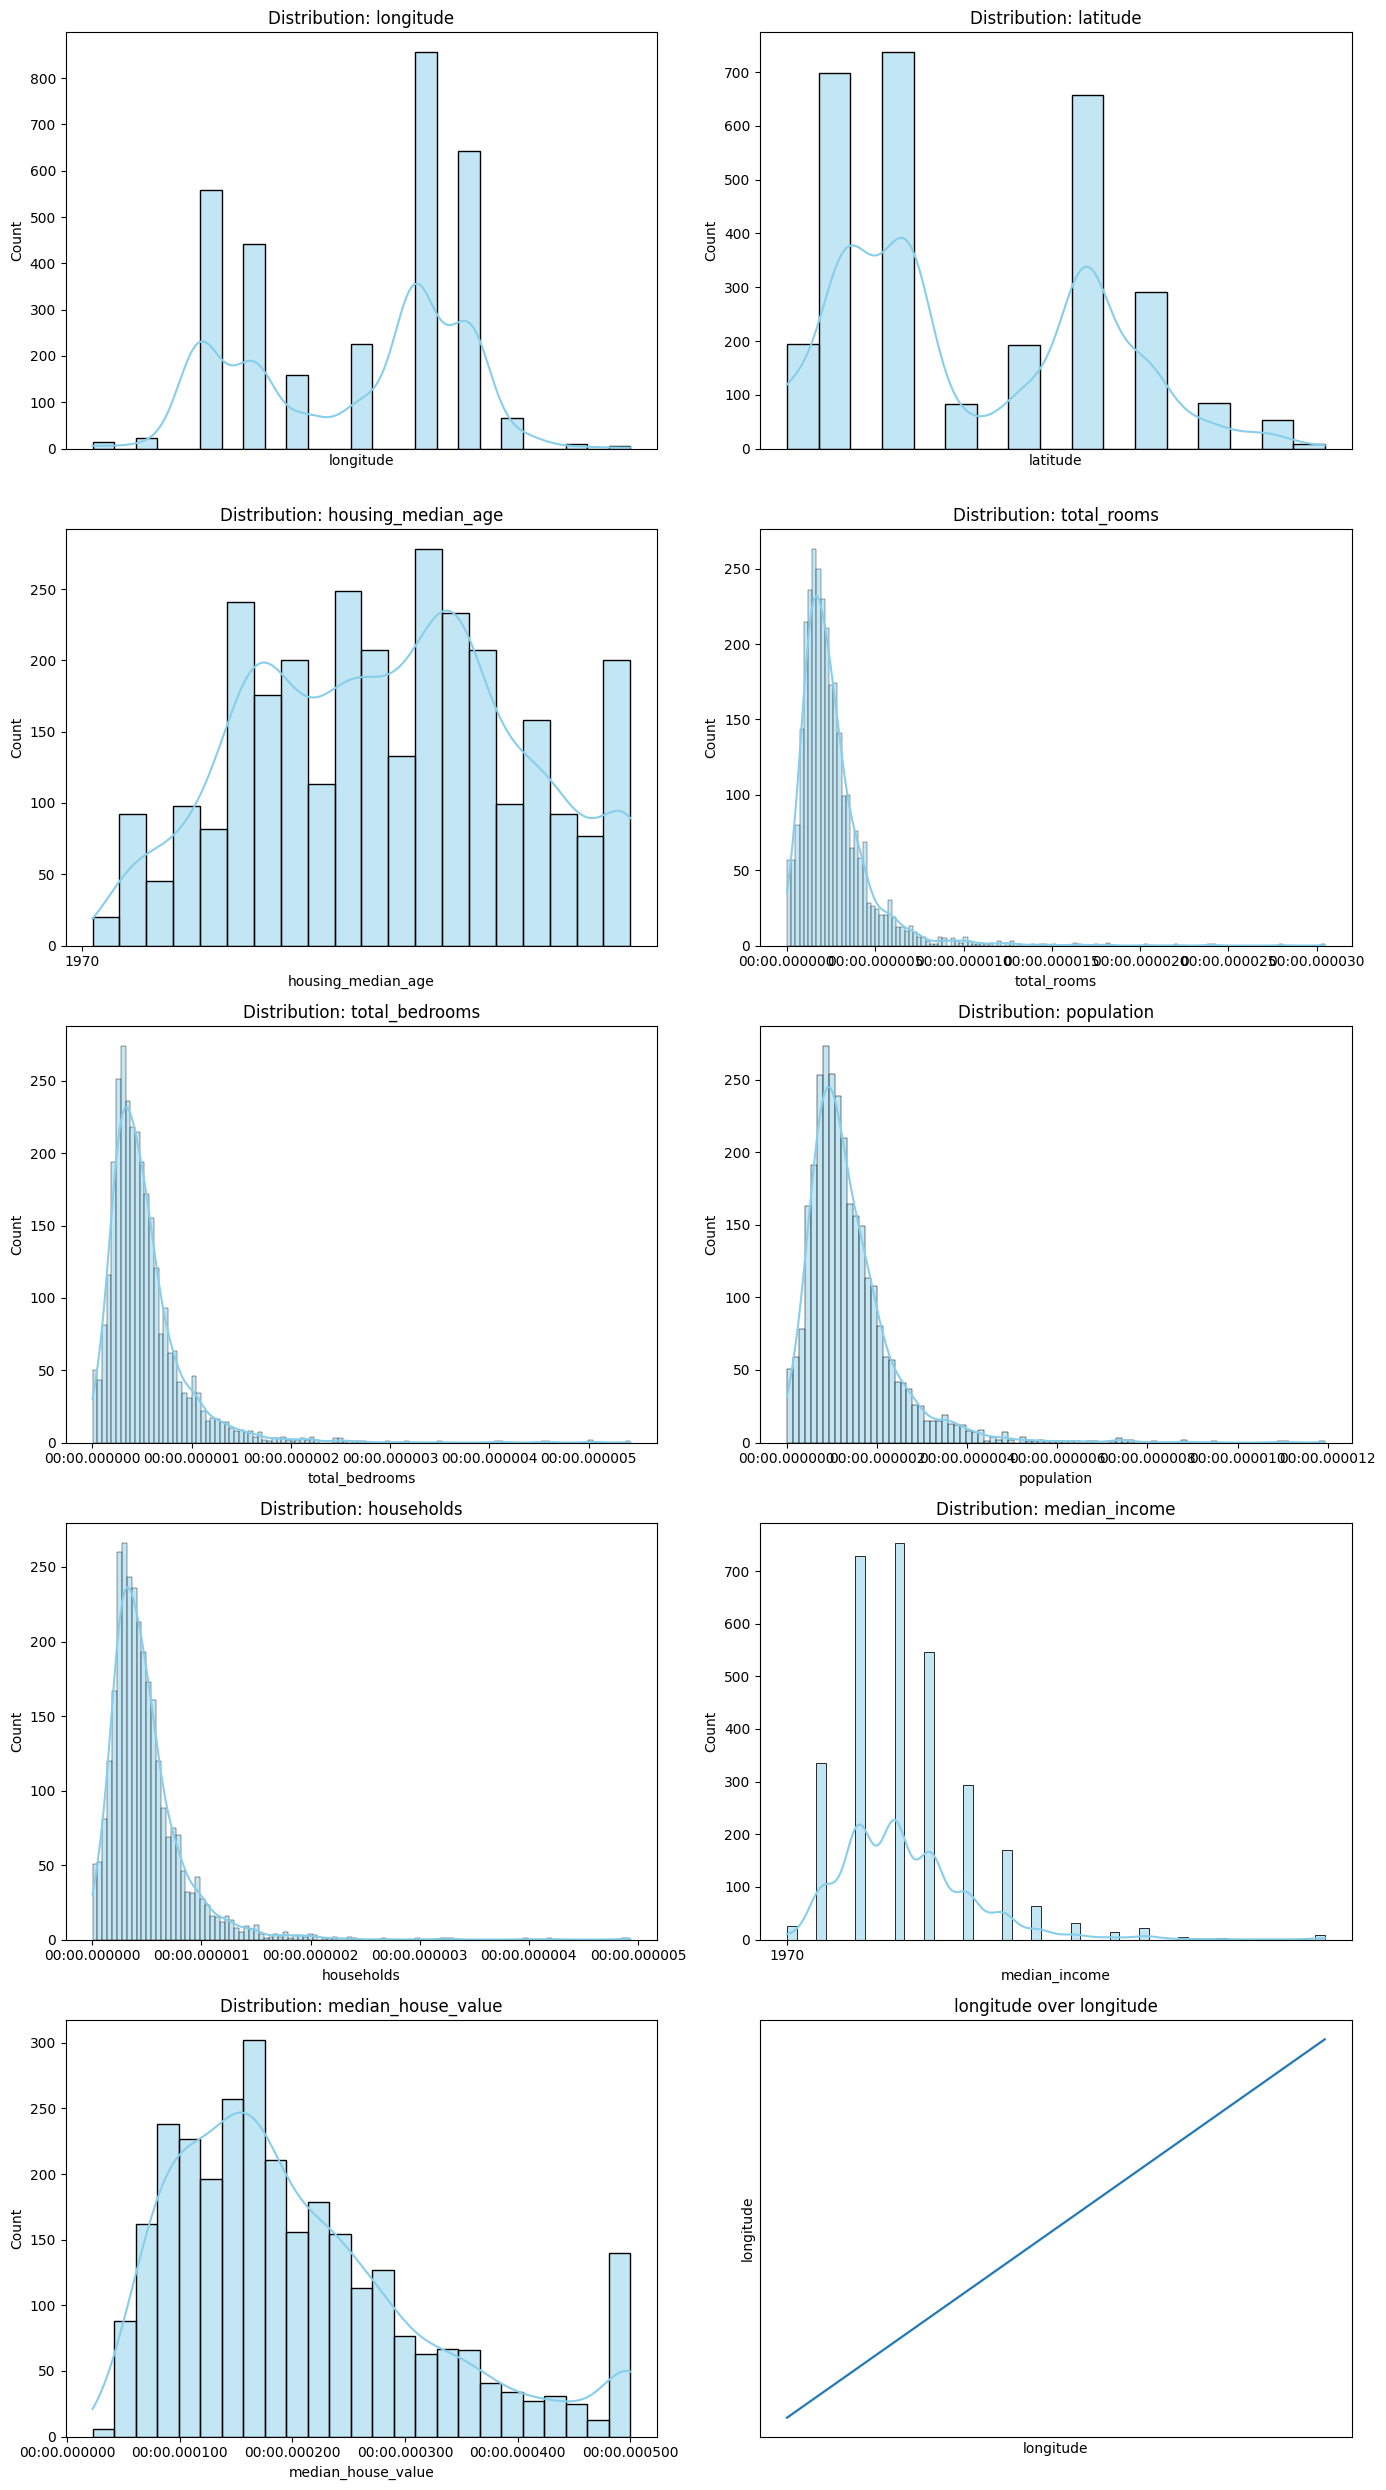

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Step 1: Load CSV
df = pd.read_csv("/content/sample_data/california_housing_test.csv")  # Replace with any file path
df.columns = df.columns.str.strip().str.replace(' ', '_')  # Clean column names

# 🔹 Step 2: Basic Cleaning
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna("Unknown")

# 🔹 Step 3: Detect Column Types
numeric_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
datetime_cols = []

for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        datetime_cols.append(col)
    except:
        continue

# 🔹 Step 4: Setup Plot Grid Dynamically
total_plots = min(10, len(numeric_cols) + len(categorical_cols) + len(datetime_cols))
rows = (total_plots + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(14, 5 * rows))
axes = axes.flatten()
plot_idx = 0

# 🔹 Step 5: Plot Numeric Distributions
for col in numeric_cols:
    if plot_idx >= len(axes):
        break
    sns.histplot(df[col], kde=True, ax=axes[plot_idx], color='skyblue')
    axes[plot_idx].set_title(f"Distribution: {col}")
    plot_idx += 1

# 🔹 Step 6: Plot Categorical Counts
for col in categorical_cols:
    if plot_idx >= len(axes):
        break
    sns.countplot(x=col, data=df, ax=axes[plot_idx], palette='Set2')
    axes[plot_idx].set_title(f"Countplot: {col}")
    axes[plot_idx].tick_params(axis='x', rotation=45)
    plot_idx += 1

# 🔹 Step 7: Plot Time Series Trends
for date_col in datetime_cols:
    for num_col in numeric_cols:
        if plot_idx >= len(axes):
            break
        df_sorted = df.sort_values(by=date_col)
        sns.lineplot(x=date_col, y=num_col, data=df_sorted, ax=axes[plot_idx])
        axes[plot_idx].set_title(f"{num_col} over {date_col}")
        plot_idx += 1
    if plot_idx >= len(axes):
        break

# 🔹 Final Touch
plt.tight_layout()
plt.show()


5. NLTK-Based Text Analysis System
Develop a script that: - Preprocesses a corpus (tokenization, stopword removal, lemmatization) - Analyzes sentiment trends over time - Detects frequently occurring topics or keywords - Calculates basic readability metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Preprocessed Corpus: [['love', 'learning', 'ai', 'amazing', 'powerful'], ['data', 'science', 'difficult', 'rewarding', 'succeed'], ['sometimes', 'coding', 'frustrating', 'bug', 'annoying'], ['streamlit', 'make', 'building', 'web', 'apps', 'simple', 'fun']]

✅ Sentiment Scores Over Time: [{'date': '2023-01-01', 'sentiment': 0.902}, {'date': '2023-01-05', 'sentiment': 0.8462}, {'date': '2023-01-10', 'sentiment': -0.7706}, {'date': '2023-01-15', 'sentiment': 0.552}]


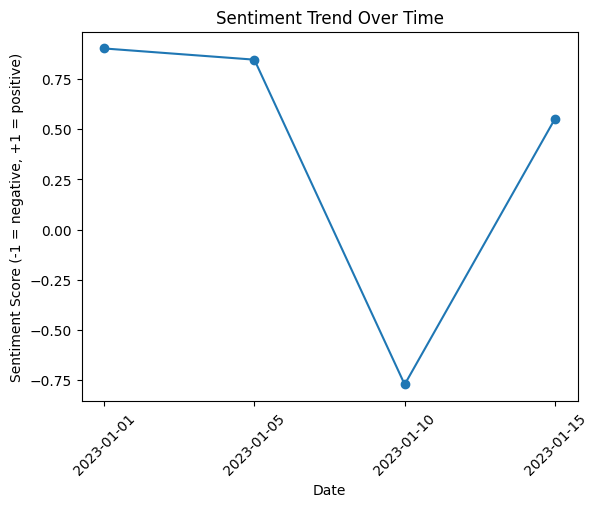


✅ Most Common Keywords: [('love', 1), ('learning', 1), ('ai', 1), ('amazing', 1), ('powerful', 1)]

✅ Readability Metrics: [{'avg_sentence_length': 5.5, 'avg_word_length': 3.3636363636363638}, {'avg_sentence_length': 11.0, 'avg_word_length': 4.363636363636363}, {'avg_sentence_length': 5.5, 'avg_word_length': 4.363636363636363}, {'avg_sentence_length': 10.0, 'avg_word_length': 4.5}]


In [37]:
# 📌 Install NLTK resources (only needed once in Colab/Notebook)
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("vader_lexicon")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt

# -----------------------
# 1. Sample Corpus
# -----------------------
corpus = [
    {"date": "2023-01-01", "text": "I love learning AI. It is amazing and powerful!"},
    {"date": "2023-01-05", "text": "Data science is difficult, but rewarding when you succeed."},
    {"date": "2023-01-10", "text": "Sometimes coding can be frustrating. Bugs are so annoying!"},
    {"date": "2023-01-15", "text": "Streamlit makes building web apps very simple and fun."},
]

# -----------------------
# 2. Preprocessing
# -----------------------
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())                  # tokenize
    tokens = [w for w in tokens if w.isalpha()]           # remove punctuation/numbers
    tokens = [w for w in tokens if w not in stop_words]   # remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens]    # lemmatize
    return tokens

preprocessed_corpus = [preprocess(doc["text"]) for doc in corpus]

print("✅ Preprocessed Corpus:", preprocessed_corpus)

# -----------------------
# 3. Sentiment Analysis
# -----------------------
sia = SentimentIntensityAnalyzer()

sentiments = []
for doc in corpus:
    score = sia.polarity_scores(doc["text"])
    sentiments.append({"date": doc["date"], "sentiment": score["compound"]})

print("\n✅ Sentiment Scores Over Time:", sentiments)

# Plot sentiment trend
dates = [s["date"] for s in sentiments]
scores = [s["sentiment"] for s in sentiments]

plt.plot(dates, scores, marker="o")
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (-1 = negative, +1 = positive)")
plt.xticks(rotation=45)
plt.show()

# -----------------------
# 4. Keyword Frequency
# -----------------------
all_tokens = [word for doc in preprocessed_corpus for word in doc]
freq_dist = Counter(all_tokens)
print("\n✅ Most Common Keywords:", freq_dist.most_common(5))

# -----------------------
# 5. Readability Metrics
# -----------------------
def readability_metrics(text):
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    avg_sentence_length = len(words) / len(sentences)
    avg_word_length = sum(len(w) for w in words if w.isalpha()) / len(words)
    return {
        "avg_sentence_length": avg_sentence_length,
        "avg_word_length": avg_word_length
    }

metrics = [readability_metrics(doc["text"]) for doc in corpus]
print("\n✅ Readability Metrics:", metrics)


6. pandas Data Transformation Pipeline Implement a configurable pipeline that: - Handles missing values with various strategies - Detects and removes outliers - Performs feature scaling (normalization, standardization) - Logs each transformation step

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import logging

# Setup logging
logging.basicConfig(filename='transformation_log.txt', level=logging.INFO, format='%(asctime)s - %(message)s')

# Sample configuration dictionary
config = {
    'missing_value_strategy': 'mean',       # Options: 'mean', 'median', 'drop'
    'outlier_detection': True,              # Enable or disable outlier removal
    'scaling': 'standard'                   # Options: 'minmax', 'standard'
}

def handle_missing_values(df, strategy):
    logging.info(f"Handling missing values using strategy: {strategy}")
    if strategy == 'mean':
        return df.fillna(df.mean(numeric_only=True))
    elif strategy == 'median':
        return df.fillna(df.median(numeric_only=True))
    elif strategy == 'drop':
        return df.dropna()
    else:
        logging.warning("Invalid missing value strategy. No changes applied.")
        return df

def remove_outliers(df):
    logging.info("Removing outliers using IQR method")
    numeric_cols = df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

def scale_features(df, method):
    logging.info(f"Scaling features using method: {method}")
    numeric_cols = df.select_dtypes(include=np.number).columns
    scaler = MinMaxScaler() if method == 'minmax' else StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

def transform_pipeline(df, config):
    logging.info("Starting data transformation pipeline")

    # Step 1: Handle missing values
    df = handle_missing_values(df, config['missing_value_strategy'])

    # Step 2: Remove outliers
    if config['outlier_detection']:
        df = remove_outliers(df)

    # Step 3: Scale features
    df = scale_features(df, config['scaling'])

    logging.info("Data transformation pipeline completed")
    return df

# Example usage with dummy data
if __name__ == "__main__":

    df = pd.read_csv("/content/hospital.csv")  # Your actual dataset
    transformed_df = transform_pipeline(df, config)
    print(transformed_df.head())
    print("Original shape:", df.shape)
df = handle_missing_values(df, config['missing_value_strategy'])
print("After missing value handling:", df.shape)
if config['outlier_detection']:
    df = remove_outliers(df)
    print("After outlier removal:", df.shape)
df = scale_features(df, config['scaling'])
print("After scaling:", df.shape)






                           Admission_ID            Name       Age  Gender  \
0  4ba0c14a-62d9-43ae-9f9f-6ba24017f808     Tara Thomas -1.362540    Male   
1  e00b340c-279f-4898-9fbc-054552ad6095    Laura Rivera  1.294951  Female   
3  ed5088d6-d6a1-45f9-b994-db5a178cc659    Angela Yates  0.528367  Female   
4  be20cd2f-42b8-4c83-8871-6adf6a1254d7     Cathy Small -0.033794  Female   
5  46770815-f994-42f6-a2f4-e9f637f2c6e9  Kimberly Stone  0.835001    Male   

        BMI         Ethnicity    Height    Weight Blood_Type  \
0  0.233979  African American  0.971443  0.722383         B+   
1  0.065170         Caucasian  0.777325  0.425858         A-   
3 -0.199877         Caucasian  0.292030 -0.068351        AB+   
4 -0.977662         Caucasian -1.163857 -1.353292         O-   
5 -1.553507          Hispanic  0.292030 -1.353292         B-   

  Medical_Condition  ...            Doctor                   Hospital  \
0            Cancer  ...       Susan Bauer                   PLC Ford   
1     

7. Visualization Automation Tool
Create a script that: - Accepts any dataset as input - Generates a complete exploratory data analysis (EDA) report - Automatically selects visualization types - Includes statistical summaries alongside plot

 Loading dataset from: /content/hospital.csv
 Saving summary statistics...
 Generating visualizations...


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

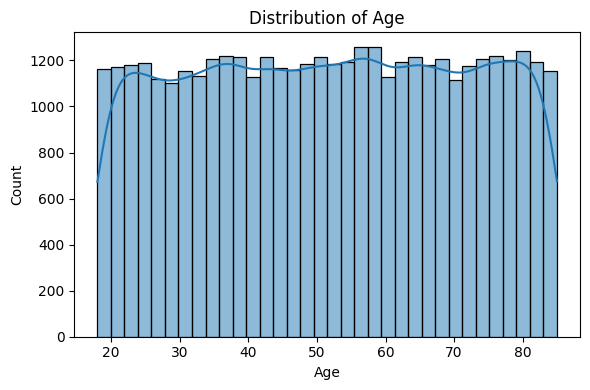

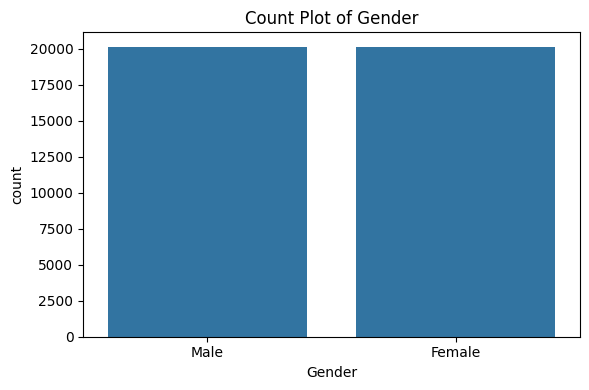

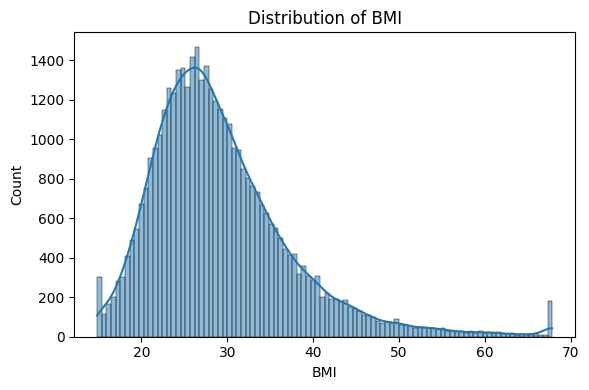

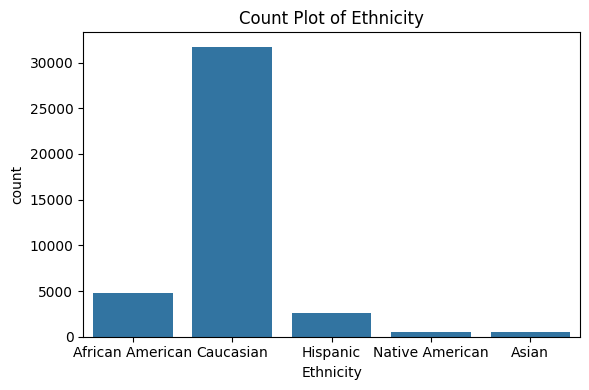

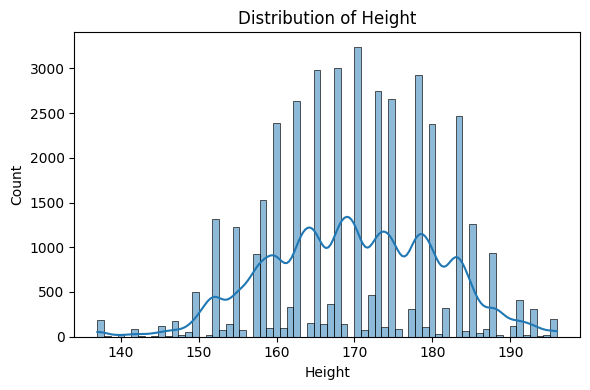

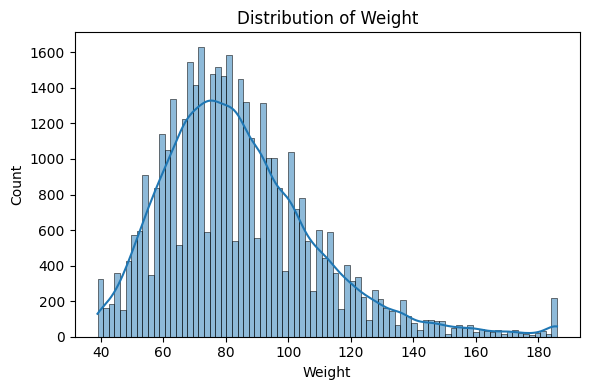

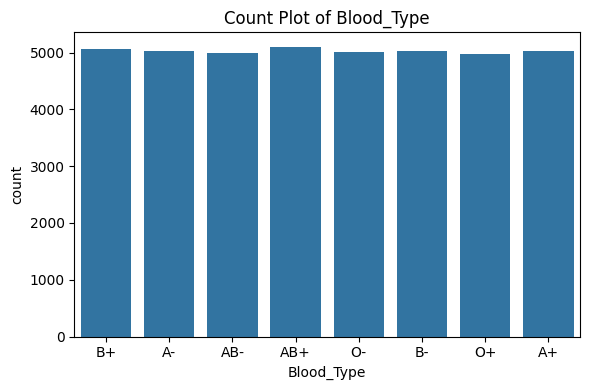

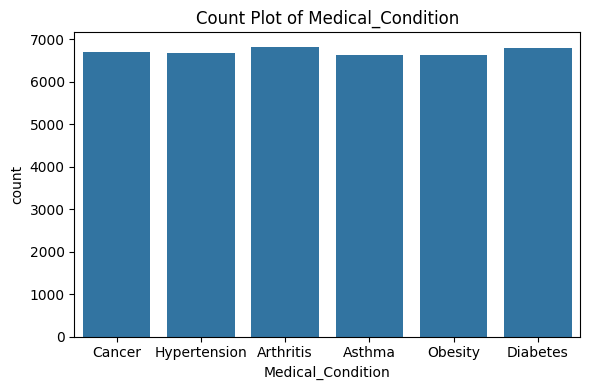

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

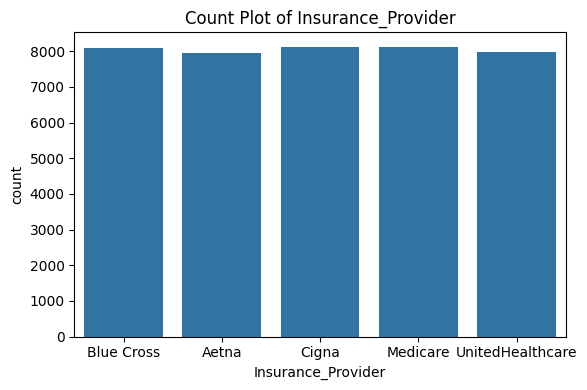

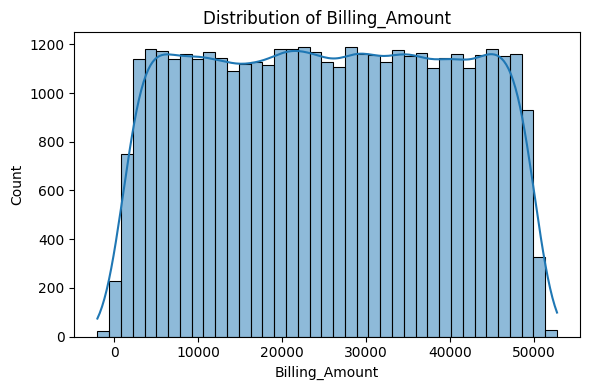

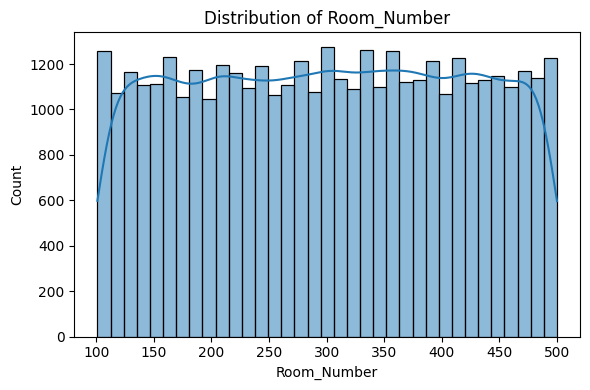

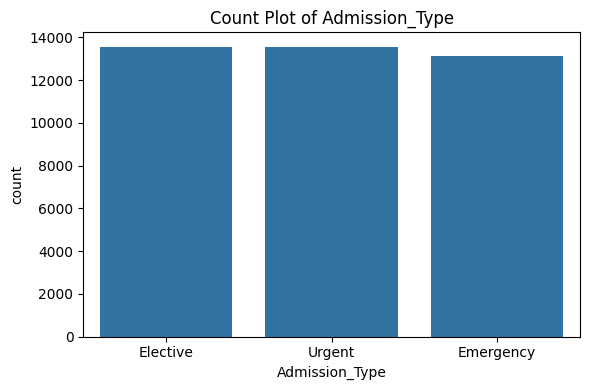

<Figure size 600x400 with 0 Axes>

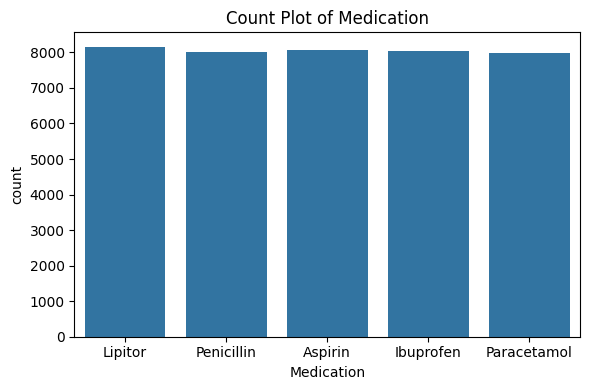

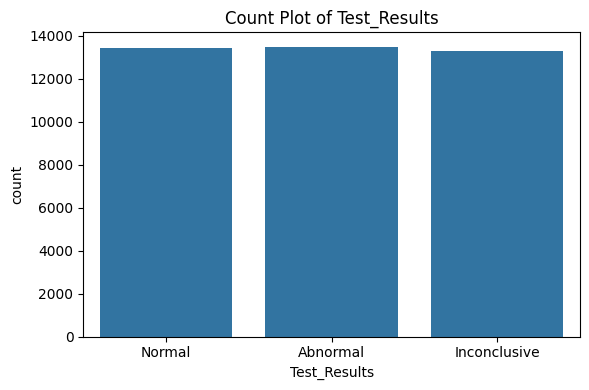

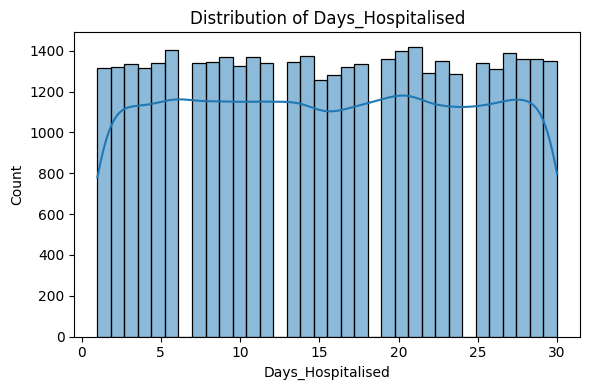

 Creating correlation heatmap...


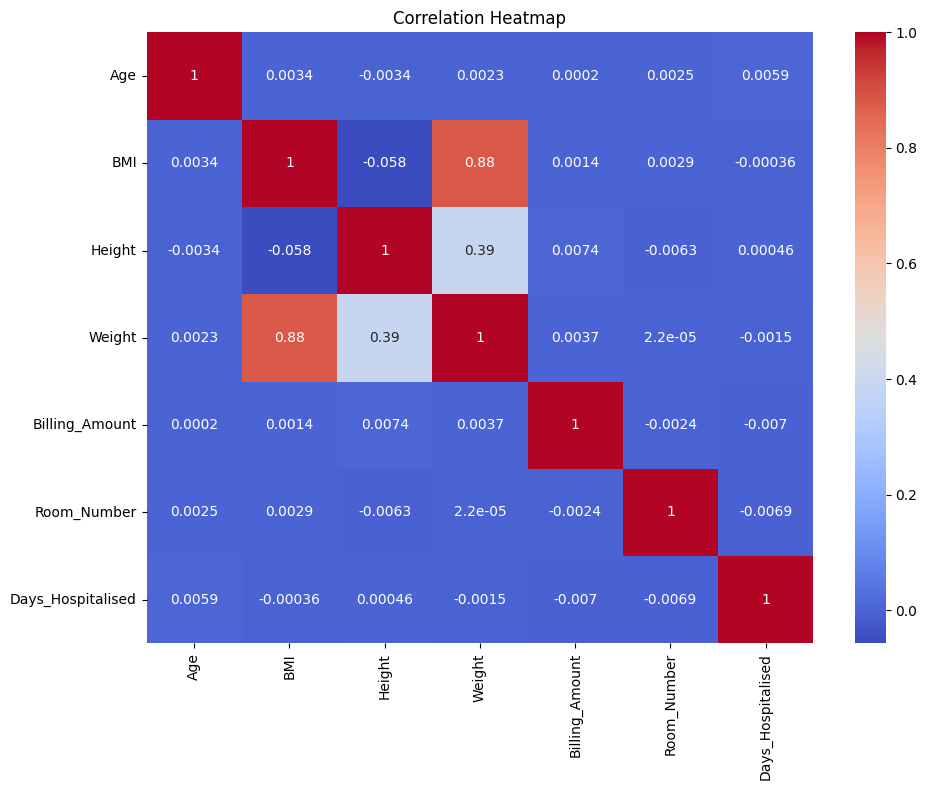

 Creating boxplots...


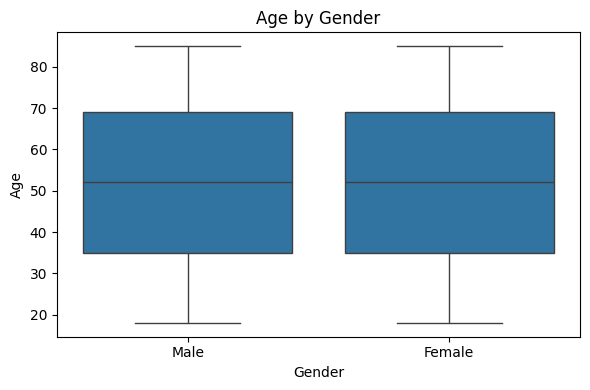

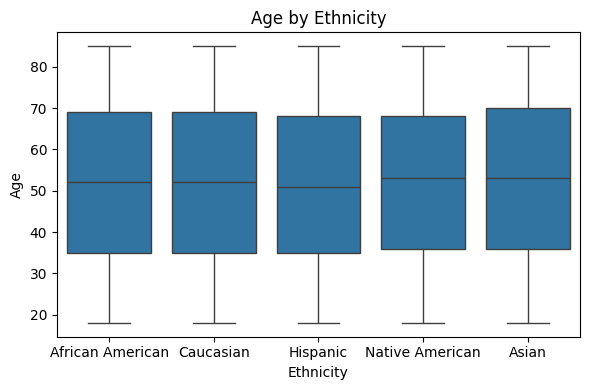

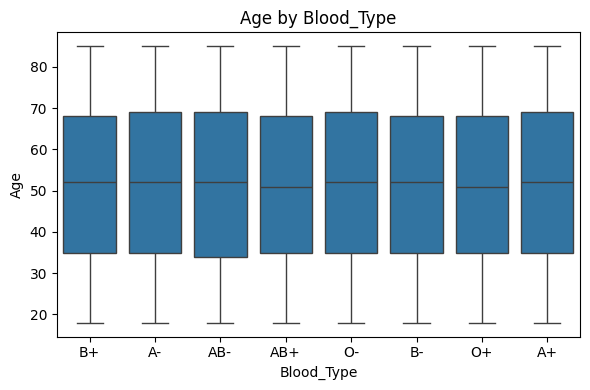

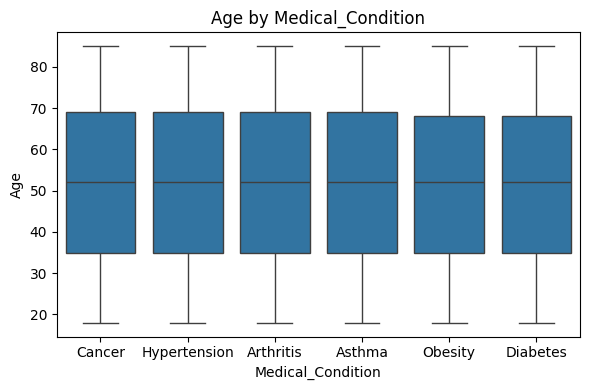

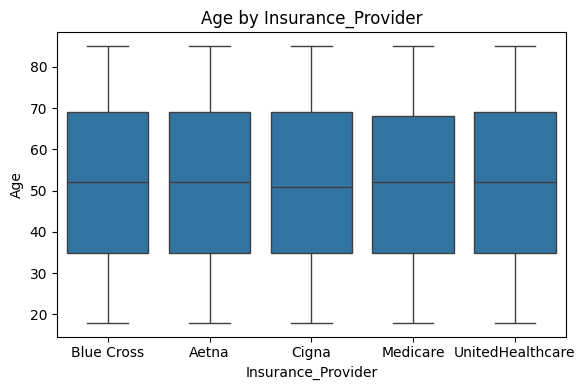

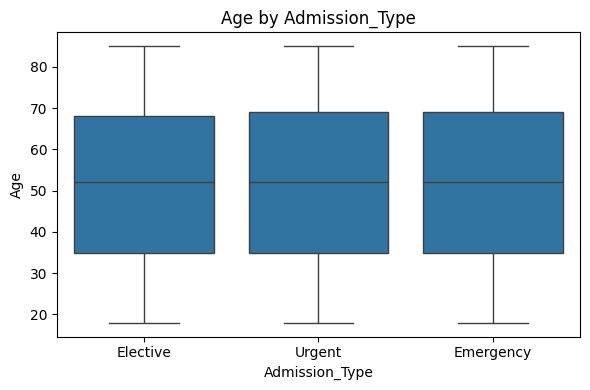

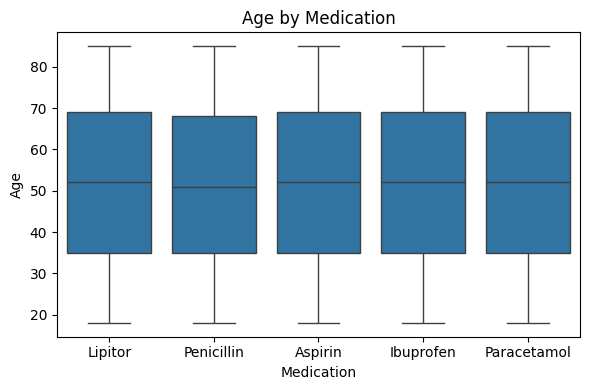

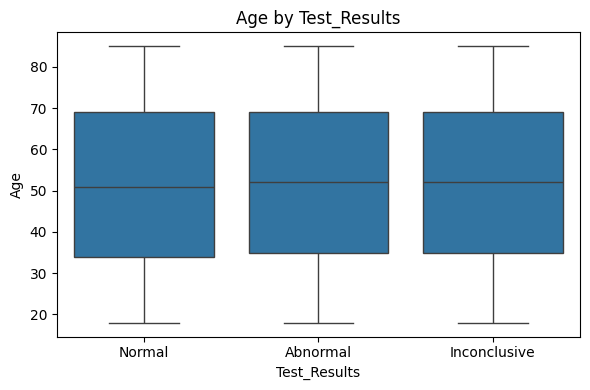

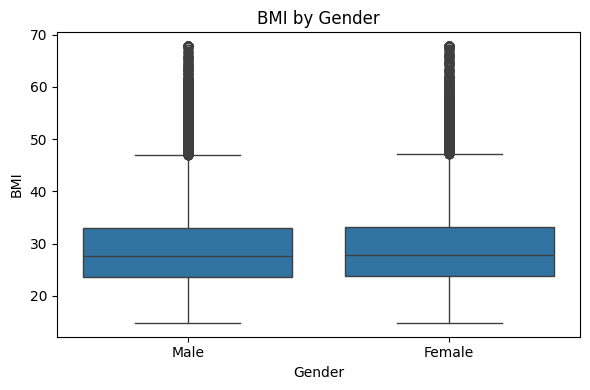

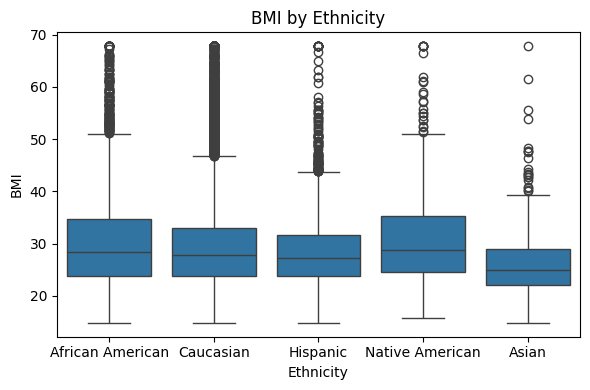

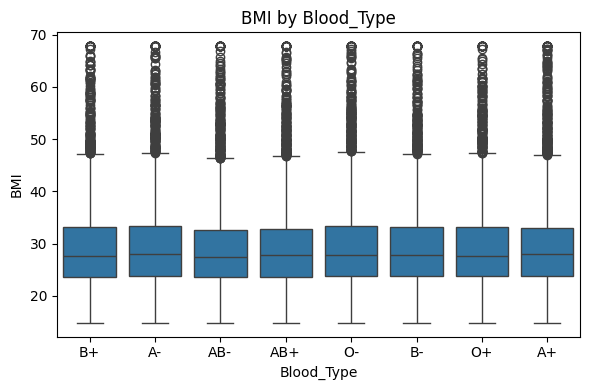

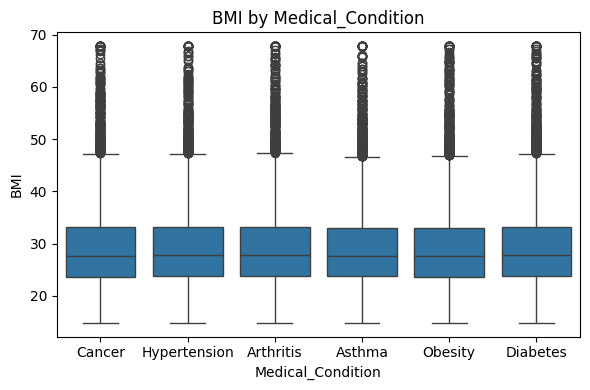

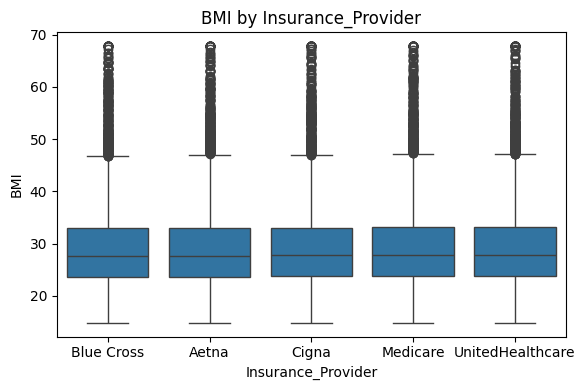

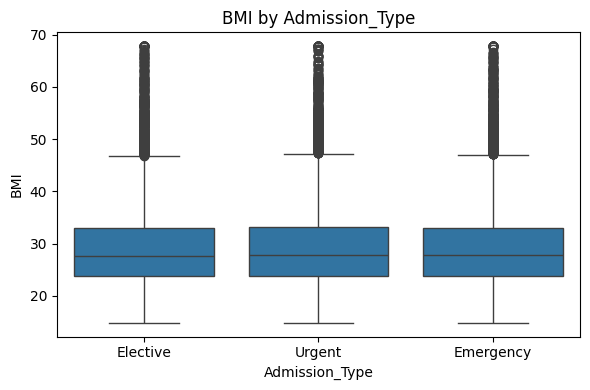

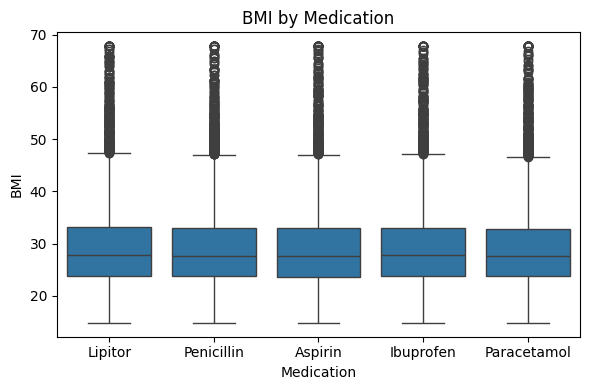

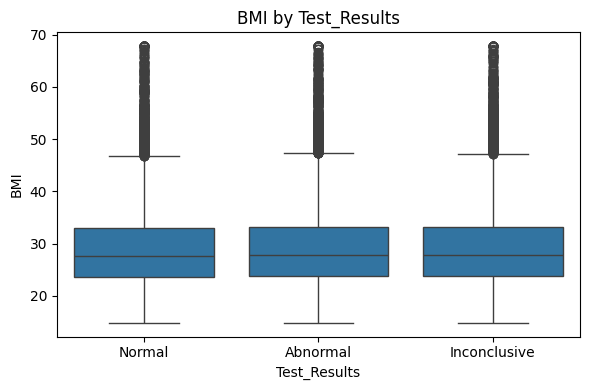

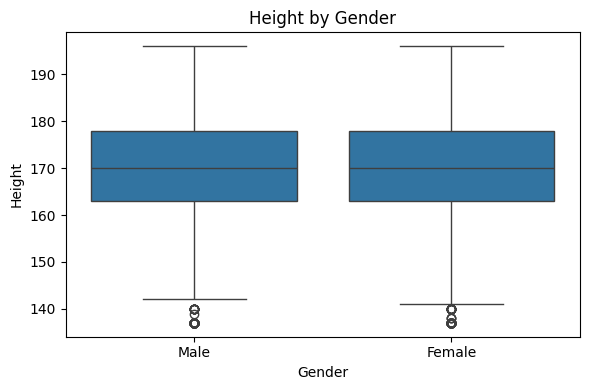

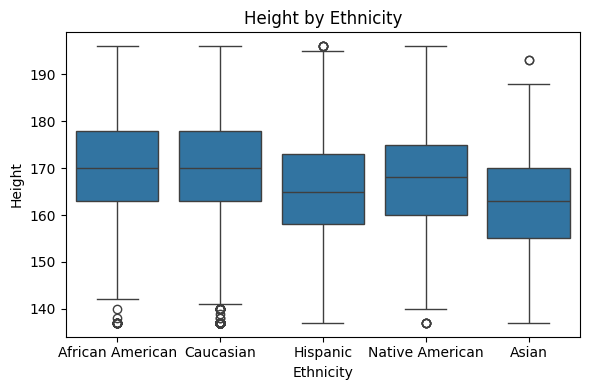

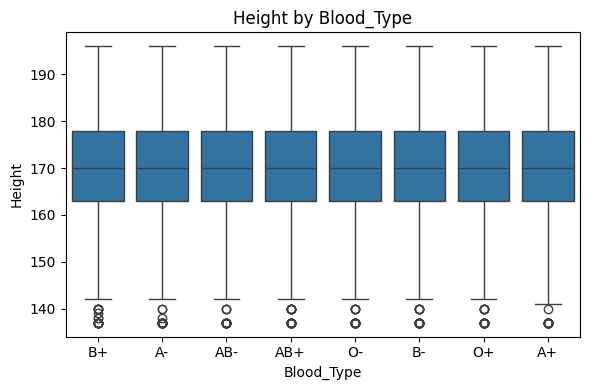

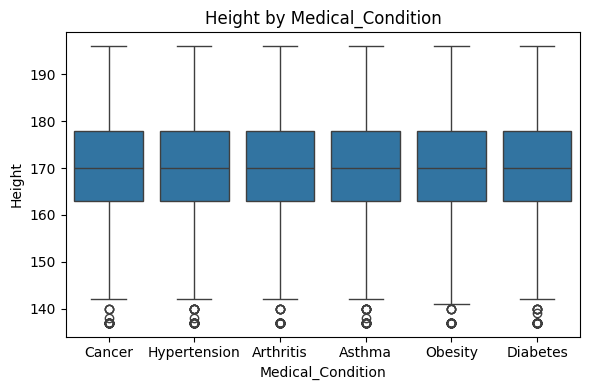

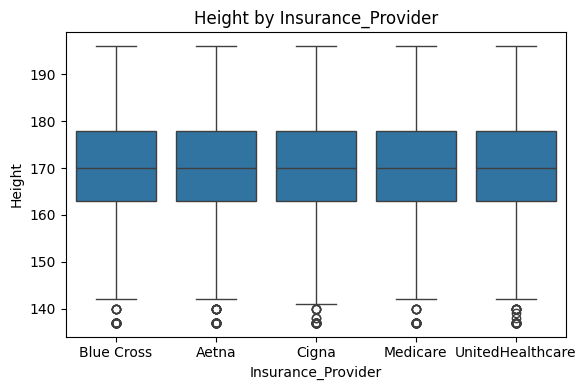

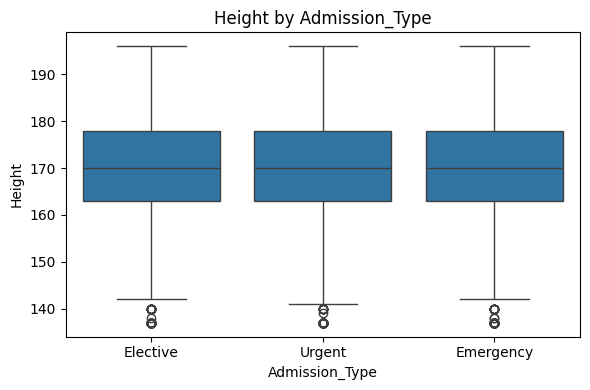

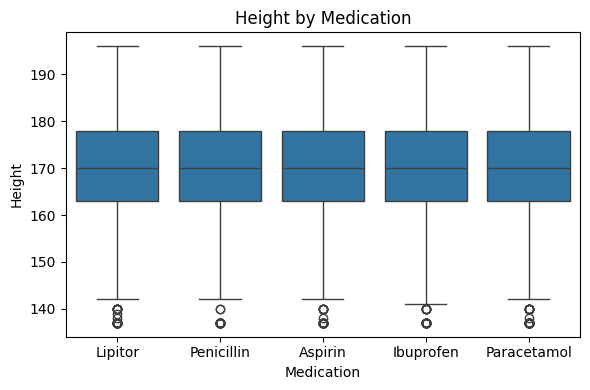

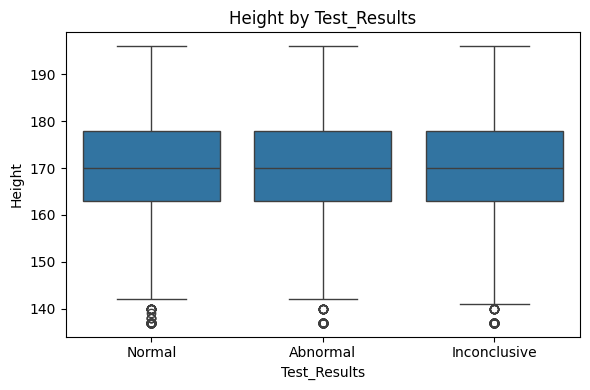

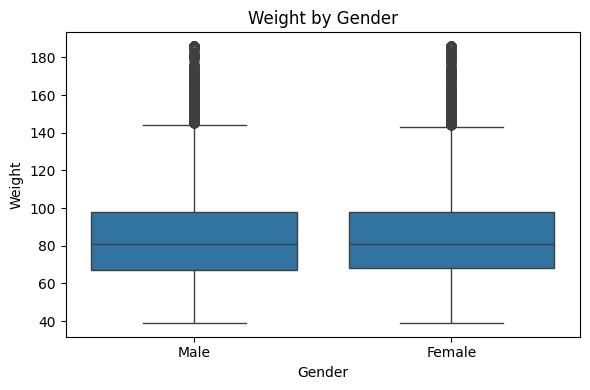

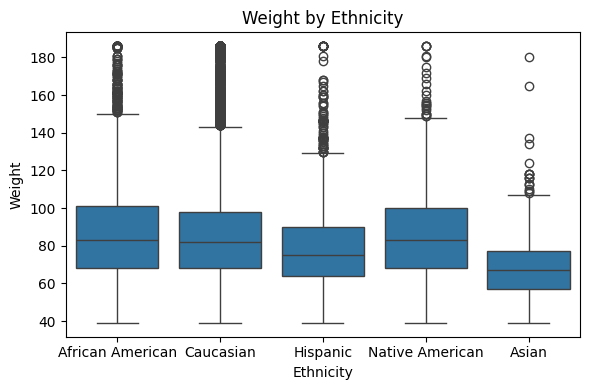

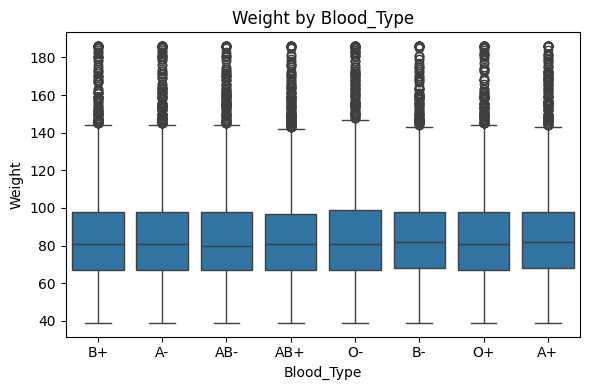

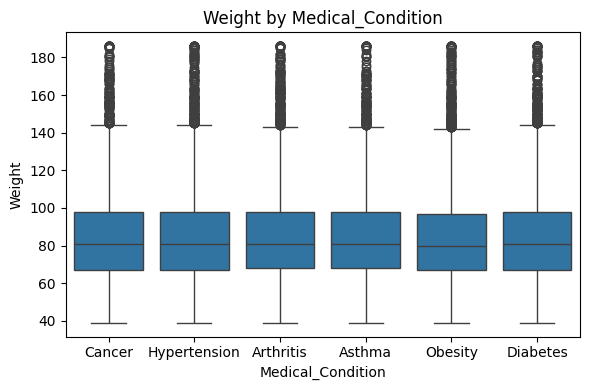

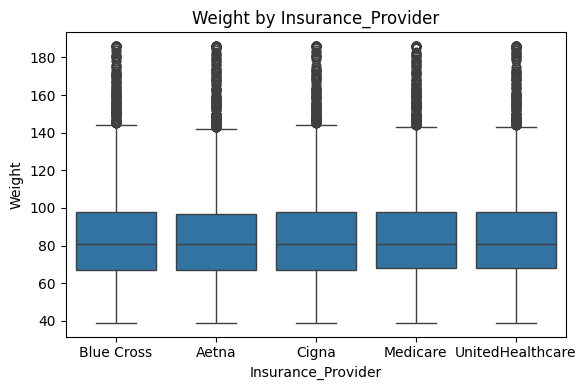

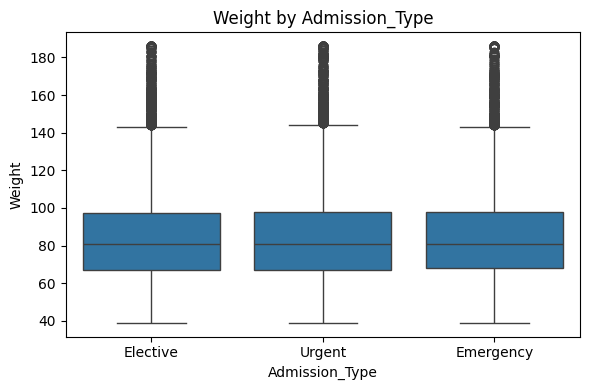

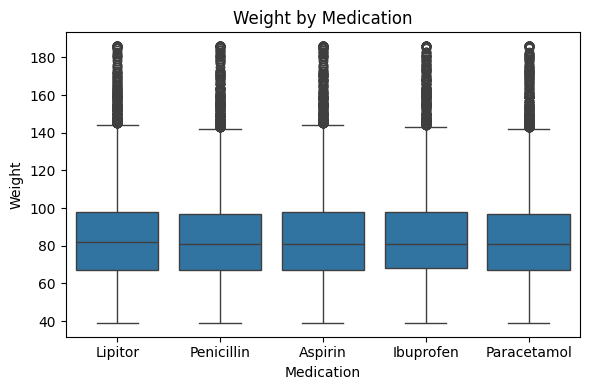

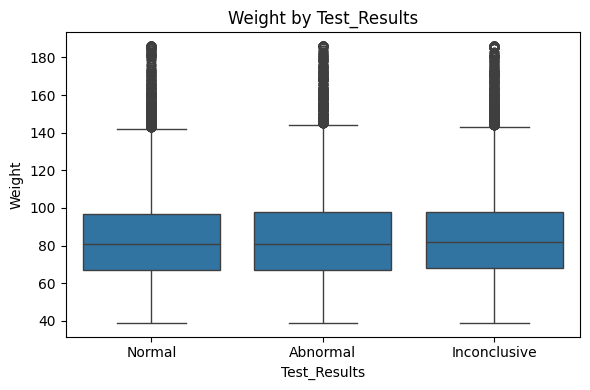

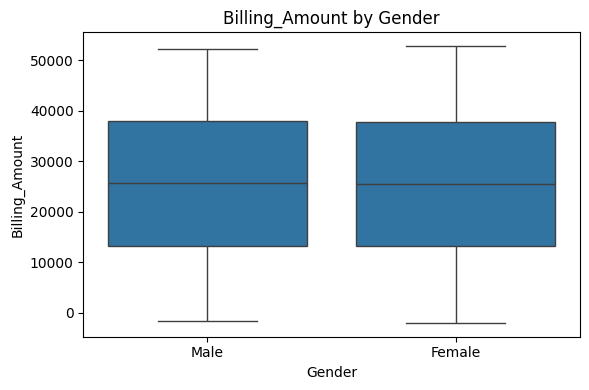

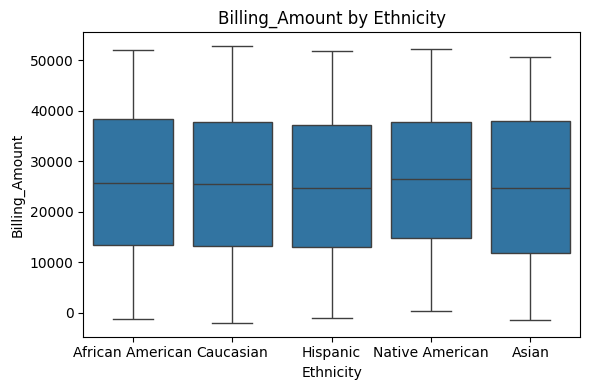

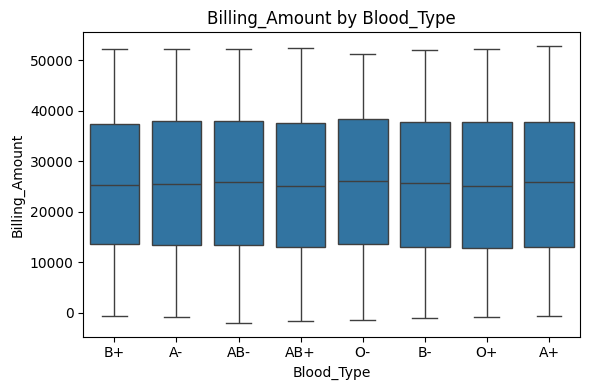

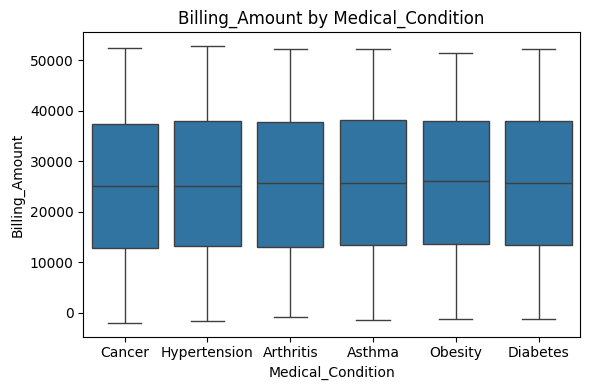

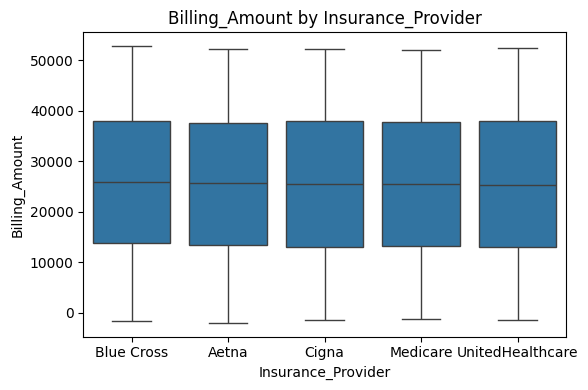

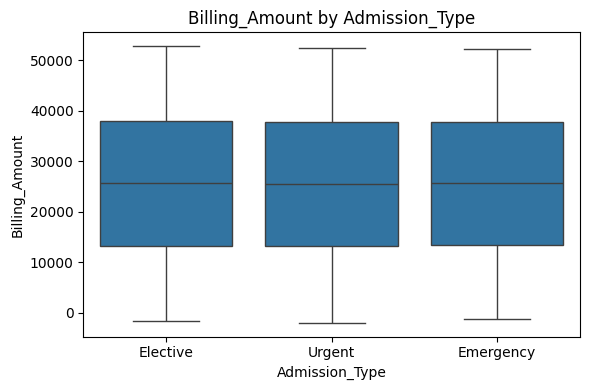

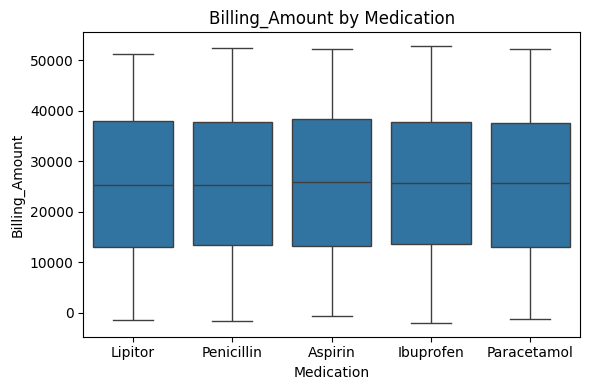

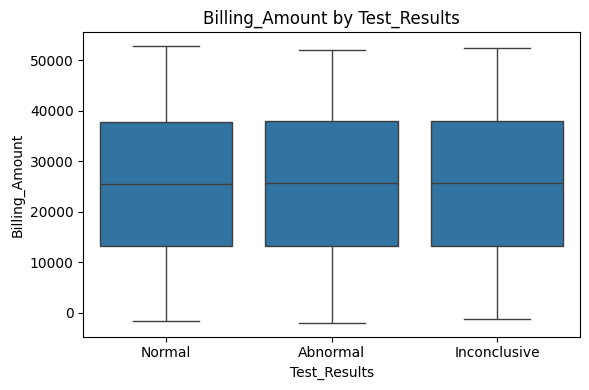

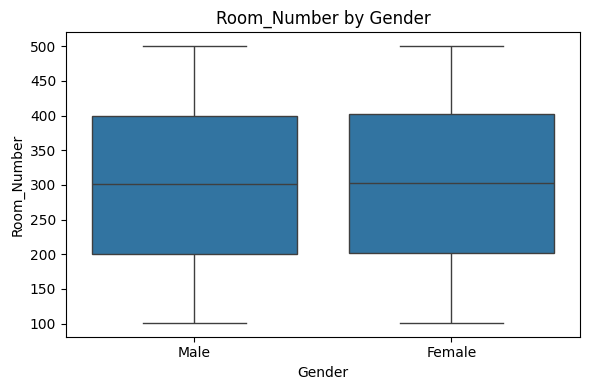

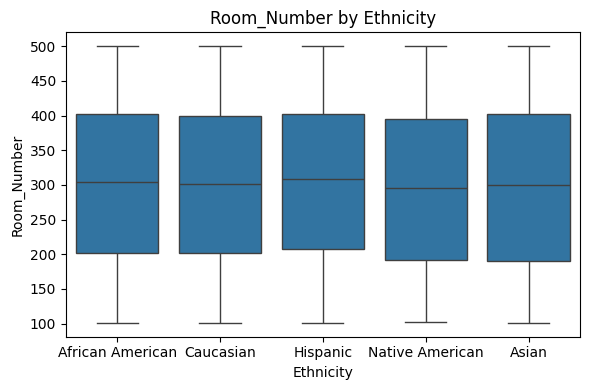

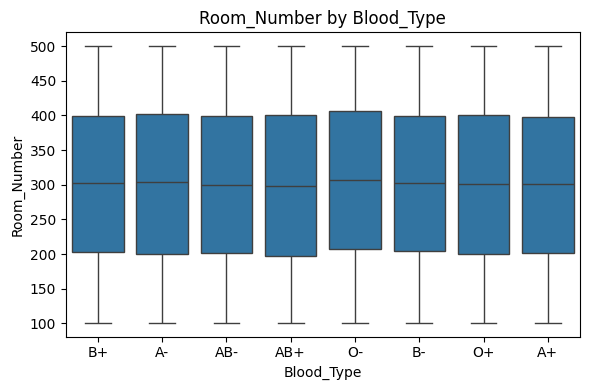

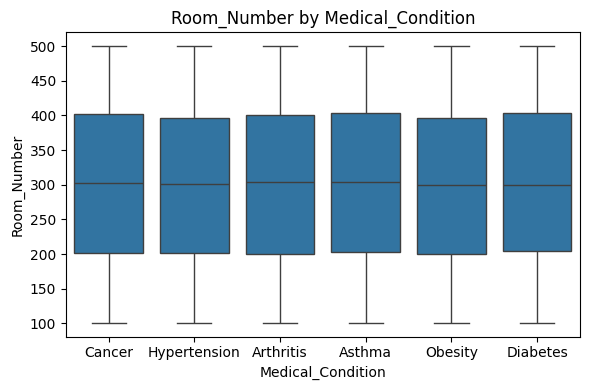

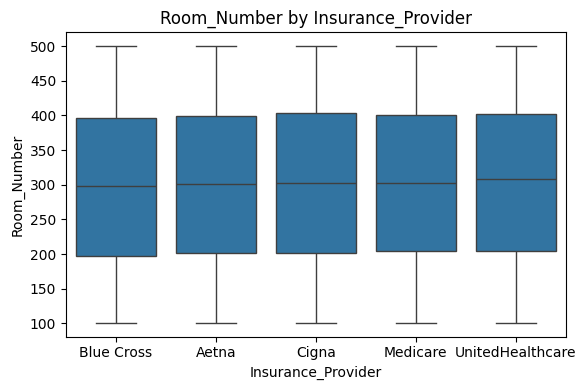

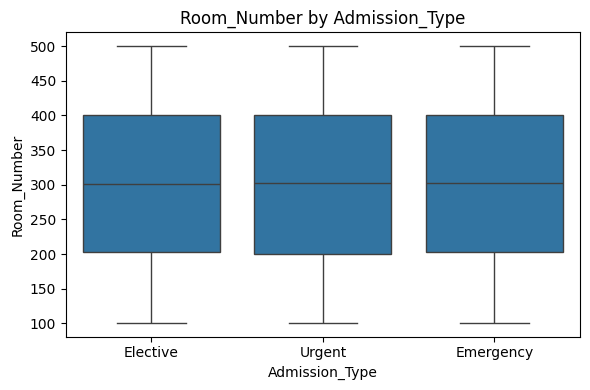

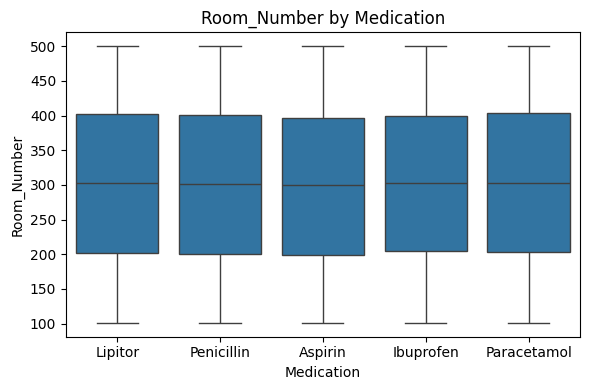

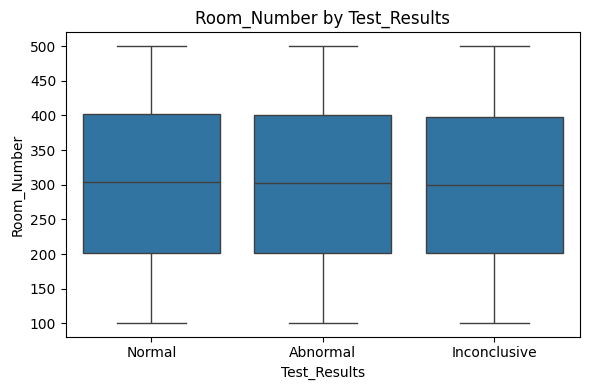

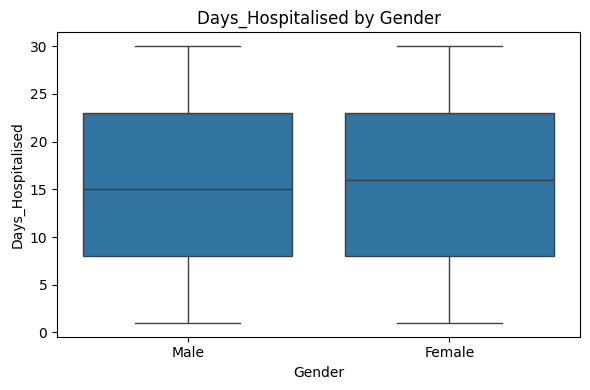

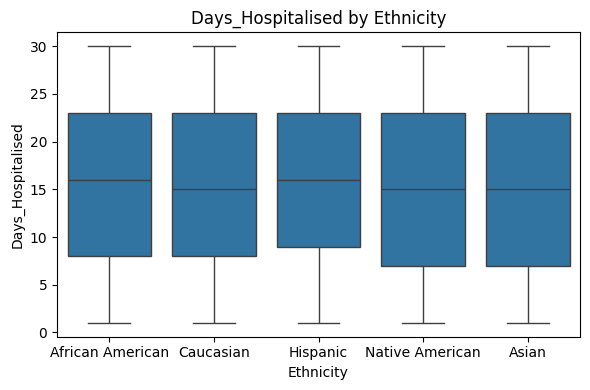

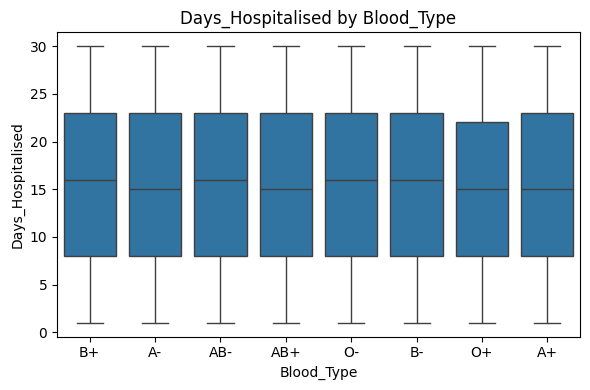

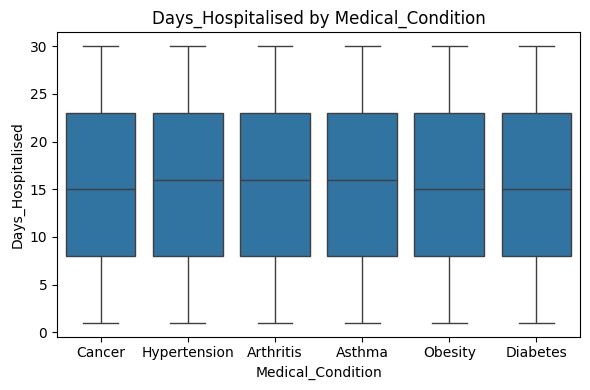

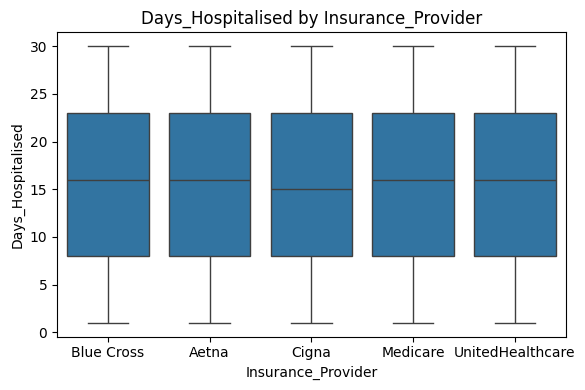

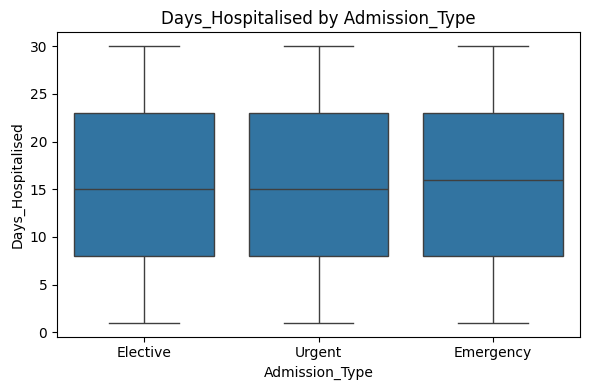

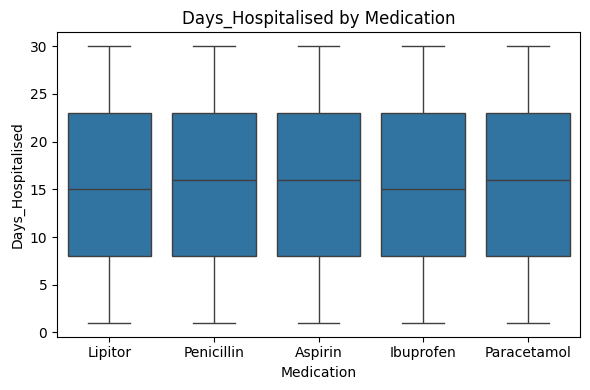

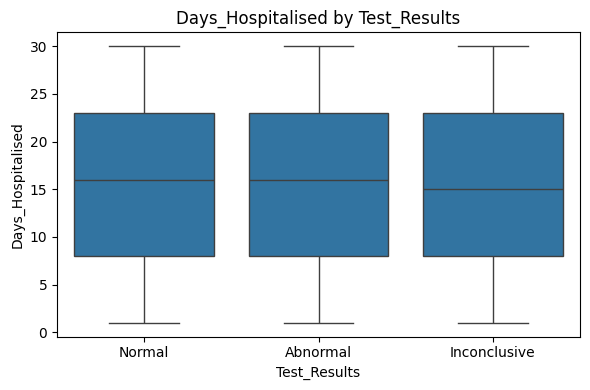

 Creating pairplot...


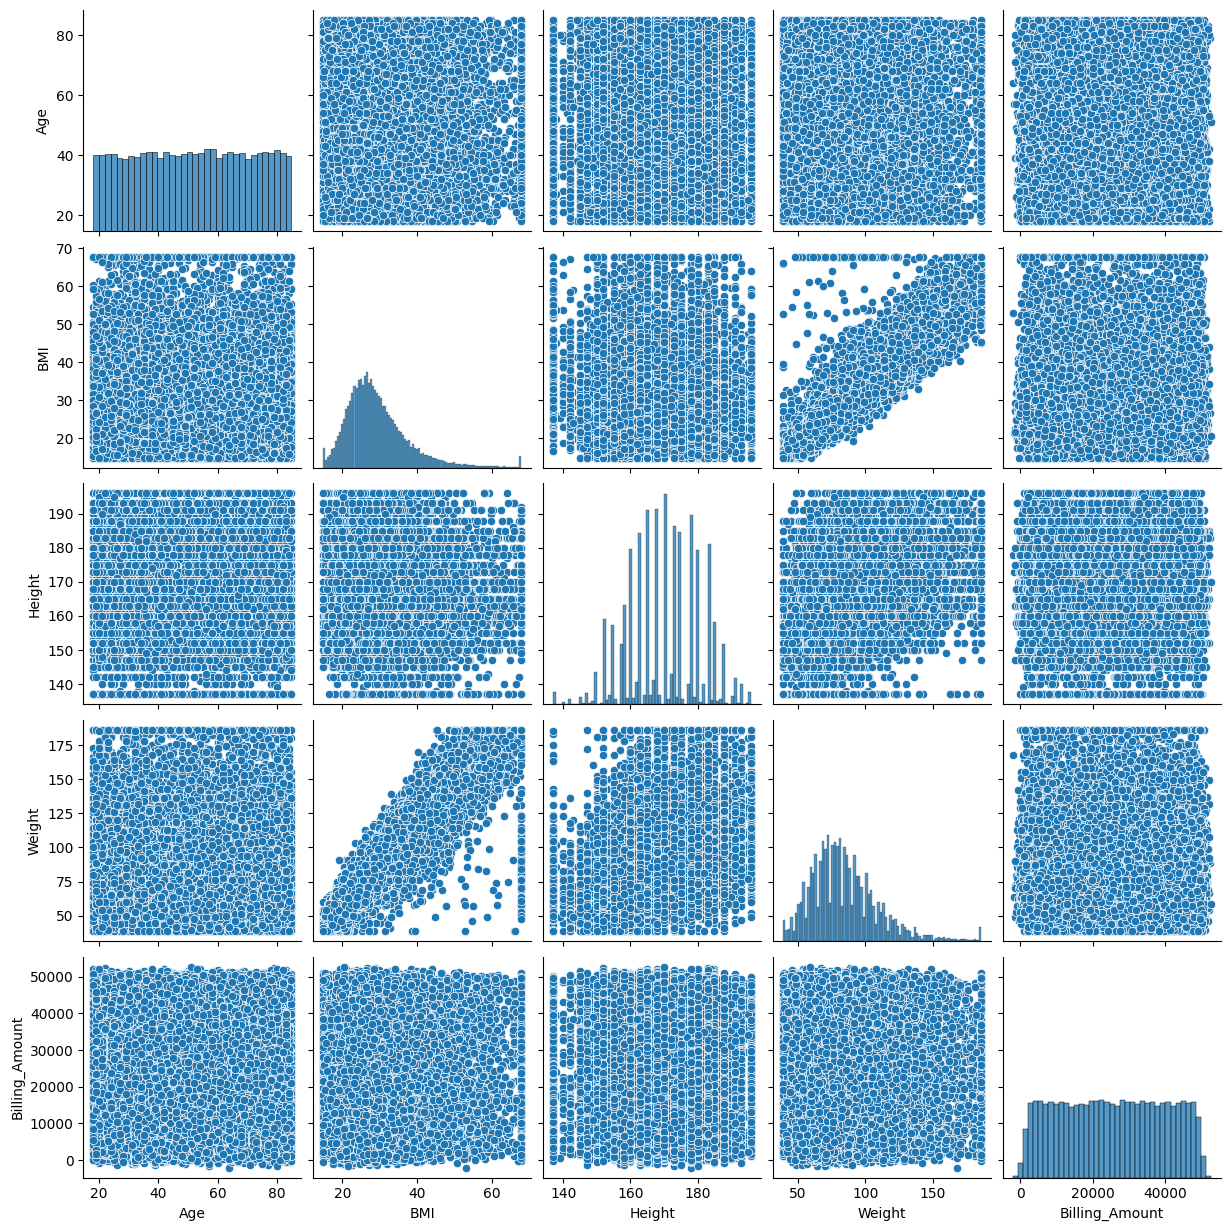

 EDA report saved in 'eda_report' folder.
 Admission_Type_plot.png


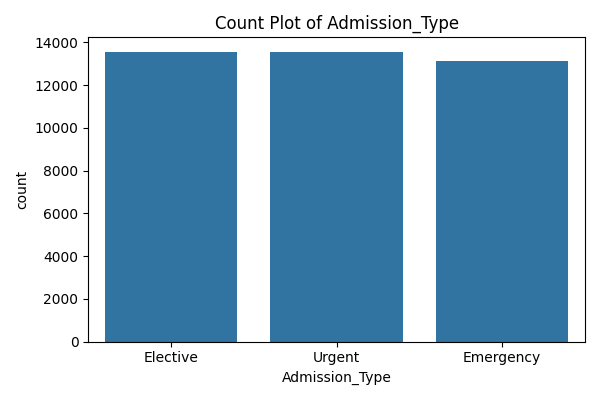

 Age_plot.png


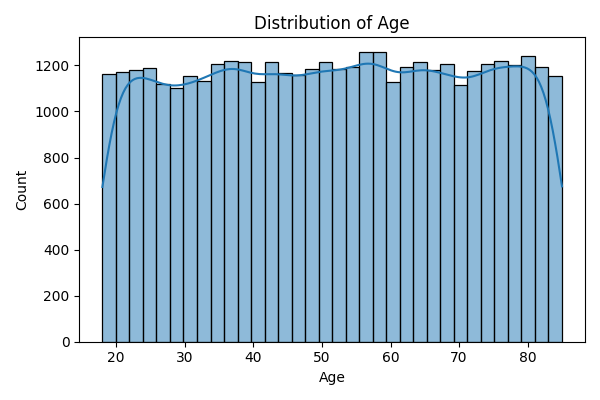

 BMI_plot.png


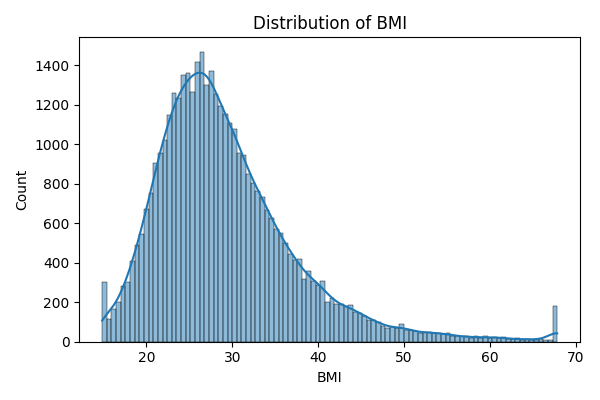

 Billing_Amount_plot.png


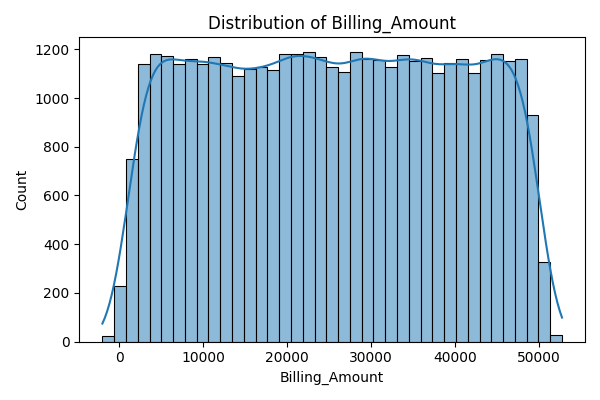

 Blood_Type_plot.png


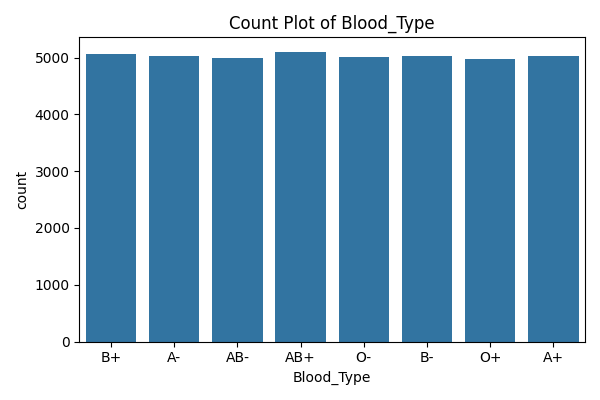

 Days_Hospitalised_plot.png


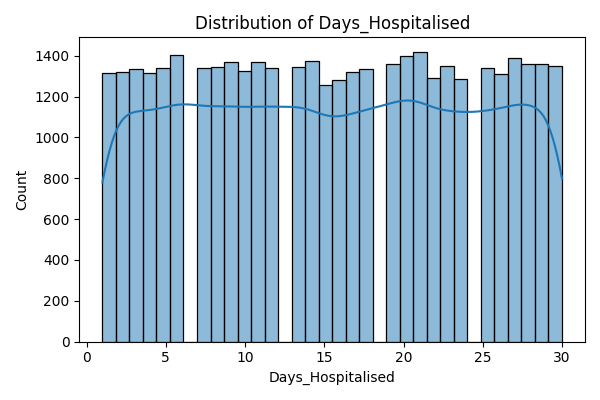

 Ethnicity_plot.png


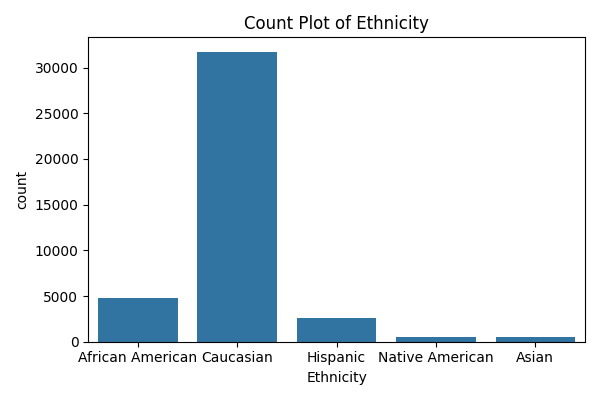

 Gender_plot.png


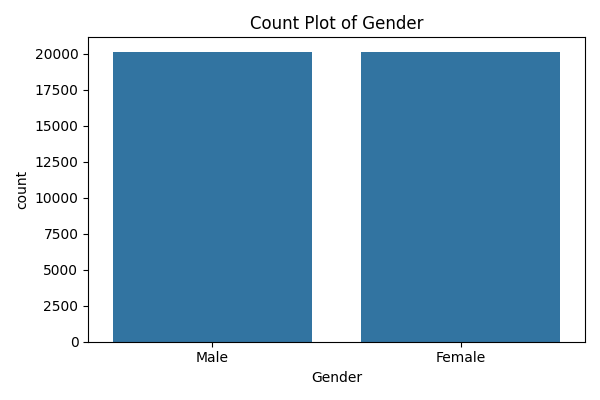

 Height_plot.png


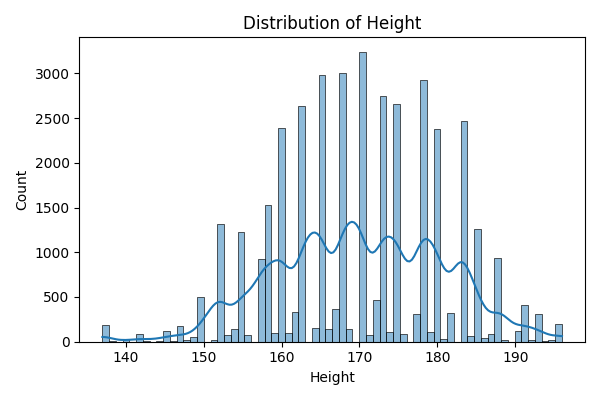

 Insurance_Provider_plot.png


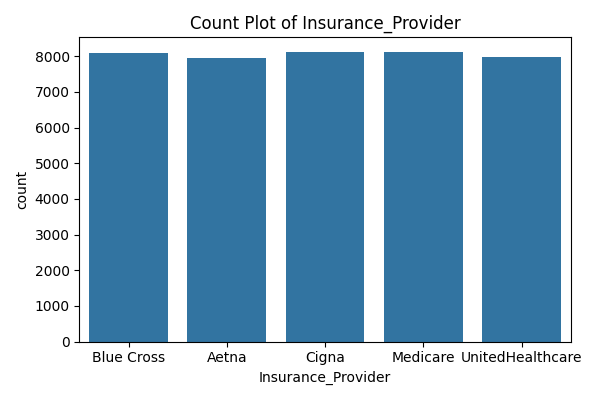

 Medical_Condition_plot.png


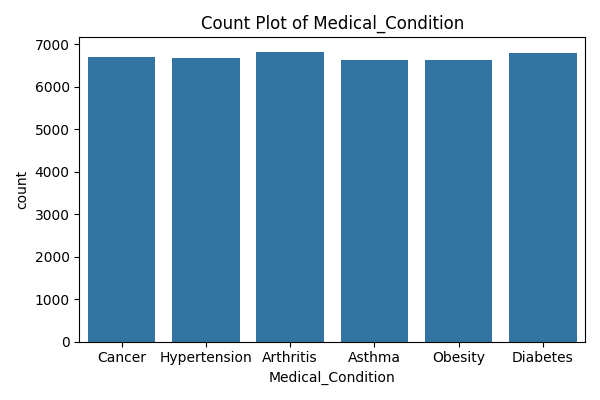

 Medication_plot.png


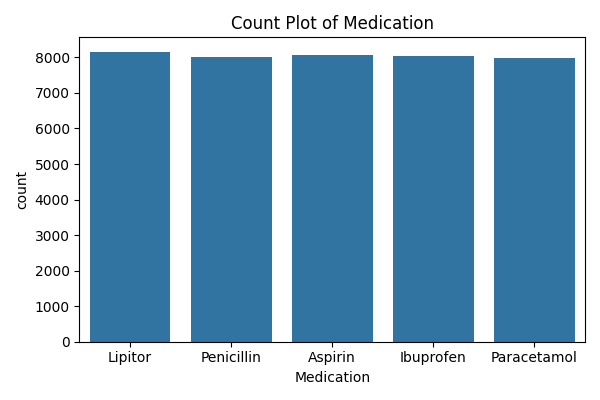

 Room_Number_plot.png


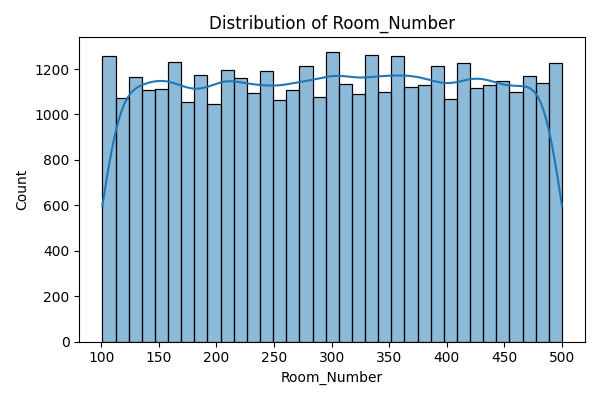

 Test_Results_plot.png


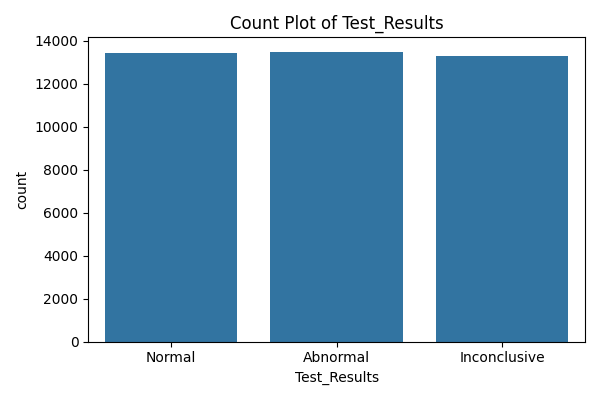

 Weight_plot.png


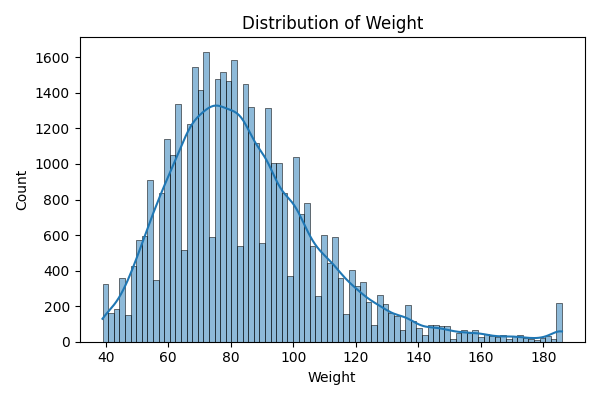

 boxplot_Age_by_Admission_Type.png


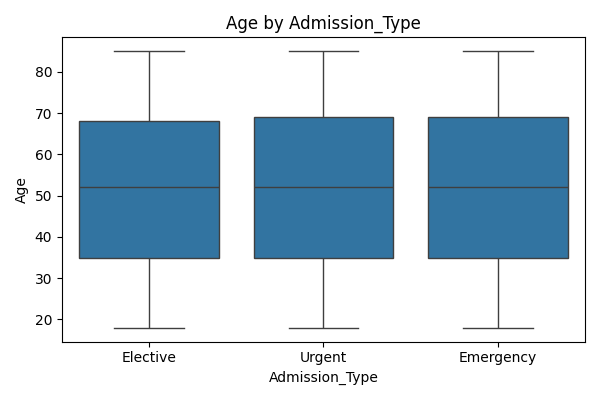

 boxplot_Age_by_Blood_Type.png


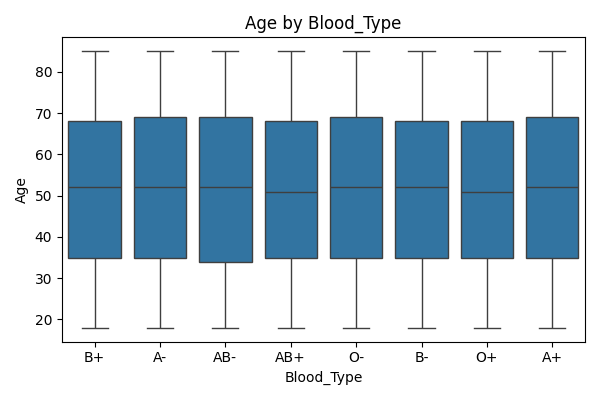

 boxplot_Age_by_Ethnicity.png


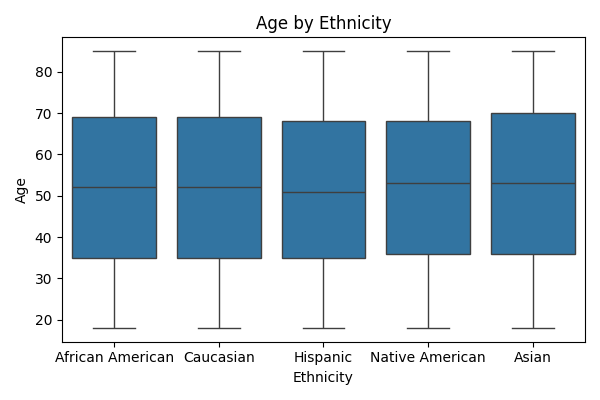

 boxplot_Age_by_Gender.png


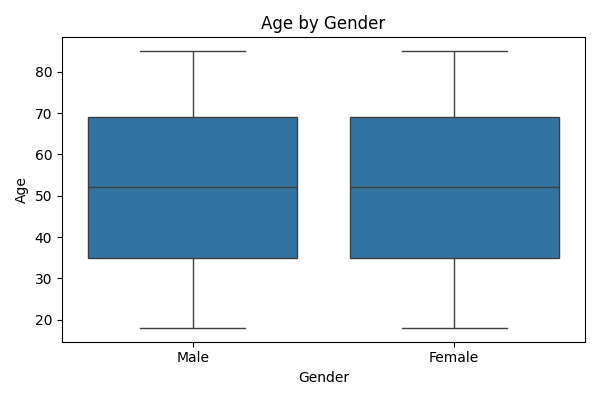

 boxplot_Age_by_Insurance_Provider.png


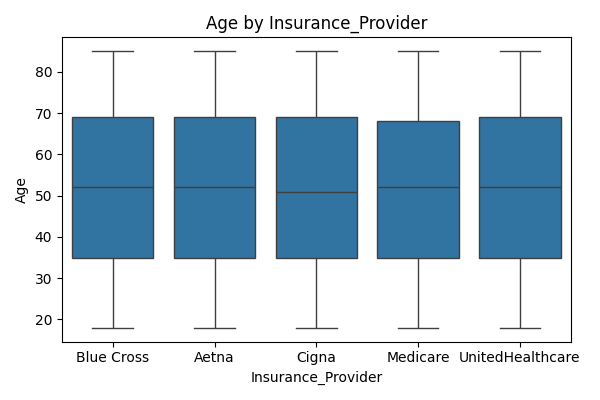

 boxplot_Age_by_Medical_Condition.png


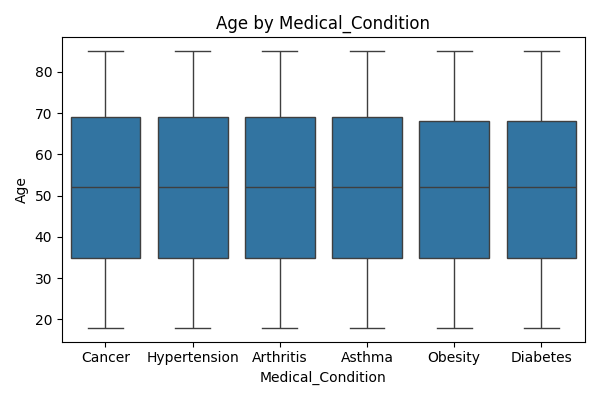

 boxplot_Age_by_Medication.png


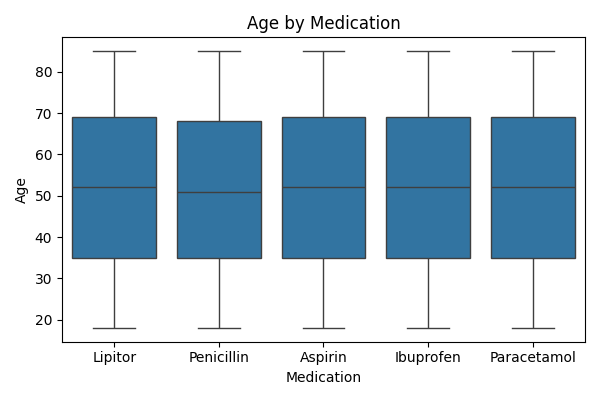

 boxplot_Age_by_Test_Results.png


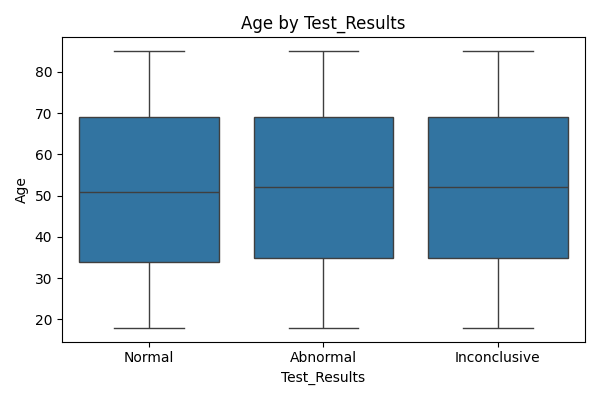

 boxplot_BMI_by_Admission_Type.png


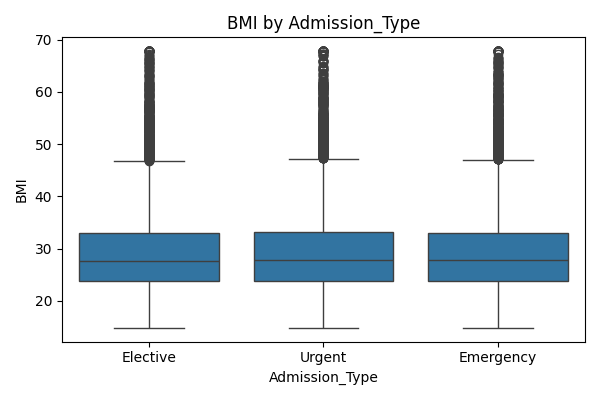

 boxplot_BMI_by_Blood_Type.png


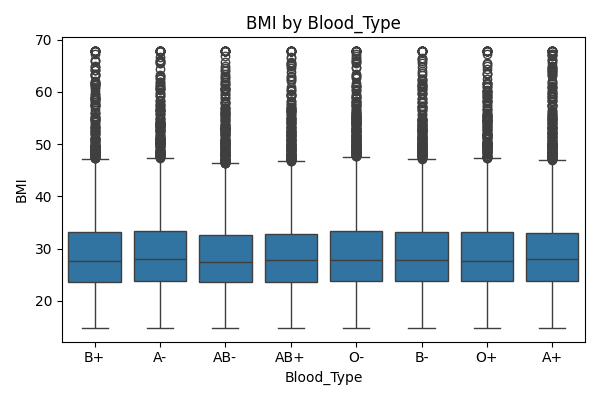

 boxplot_BMI_by_Ethnicity.png


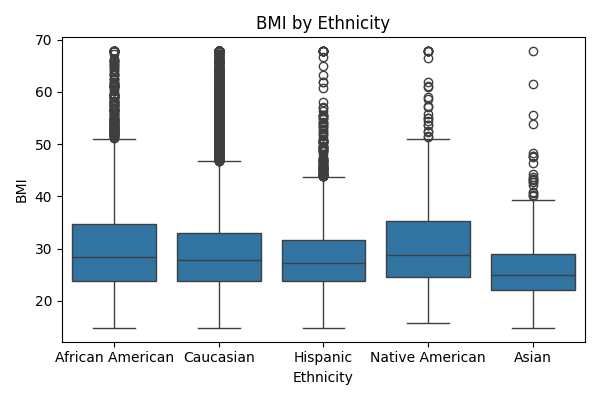

 boxplot_BMI_by_Gender.png


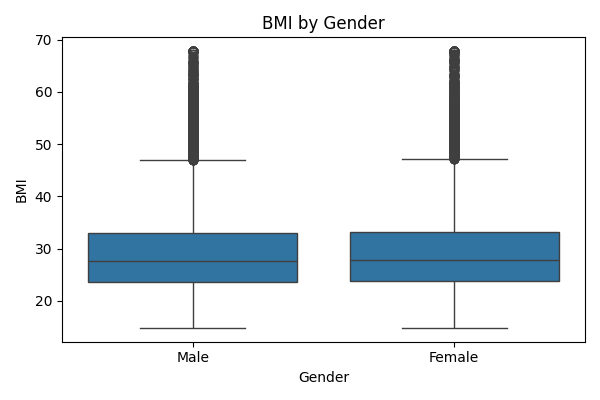

 boxplot_BMI_by_Insurance_Provider.png


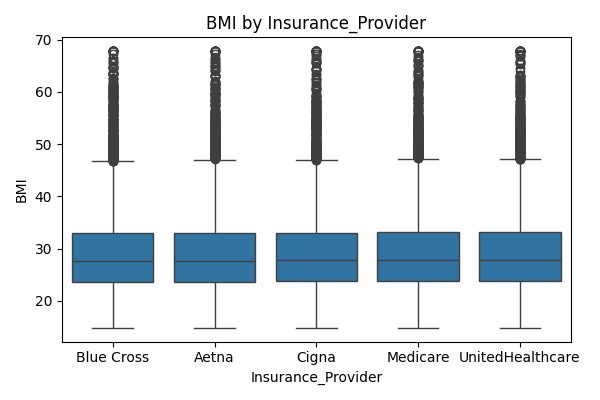

 boxplot_BMI_by_Medical_Condition.png


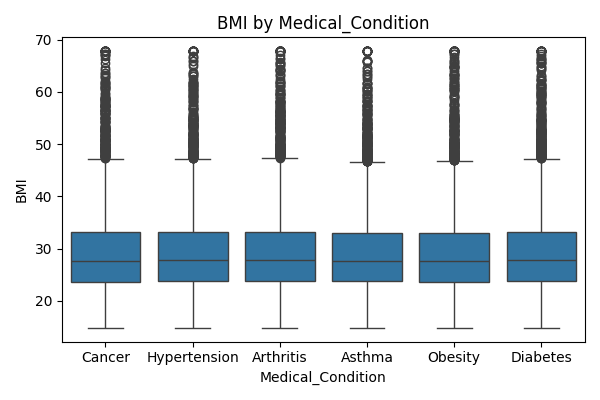

 boxplot_BMI_by_Medication.png


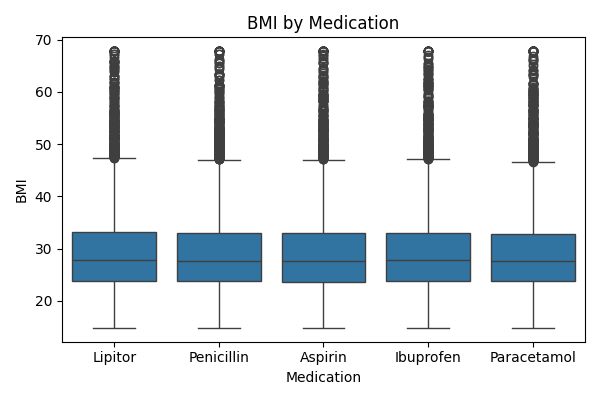

 boxplot_BMI_by_Test_Results.png


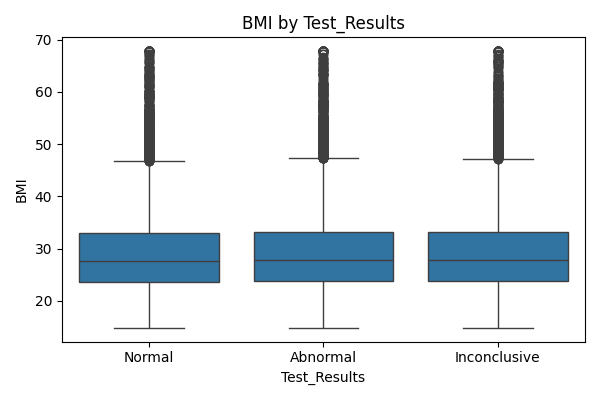

 boxplot_Billing_Amount_by_Admission_Type.png


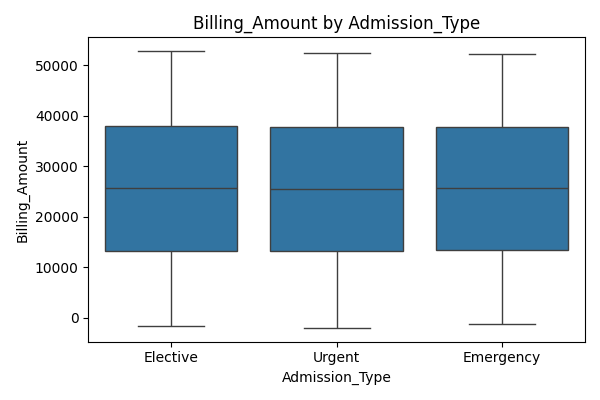

 boxplot_Billing_Amount_by_Blood_Type.png


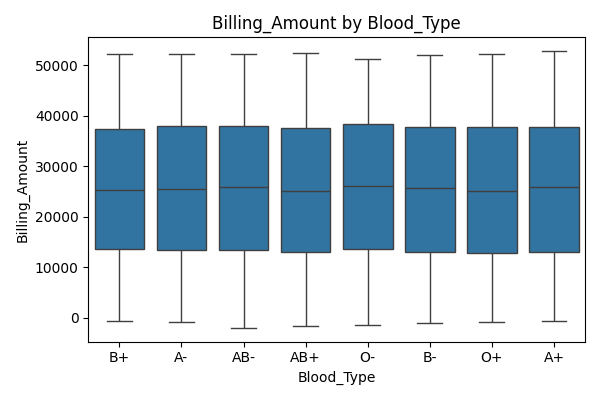

 boxplot_Billing_Amount_by_Ethnicity.png


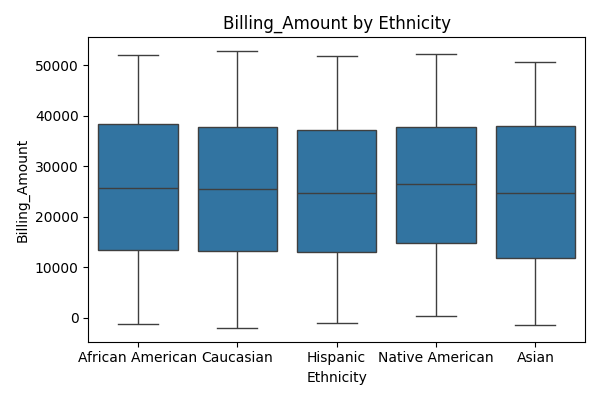

 boxplot_Billing_Amount_by_Gender.png


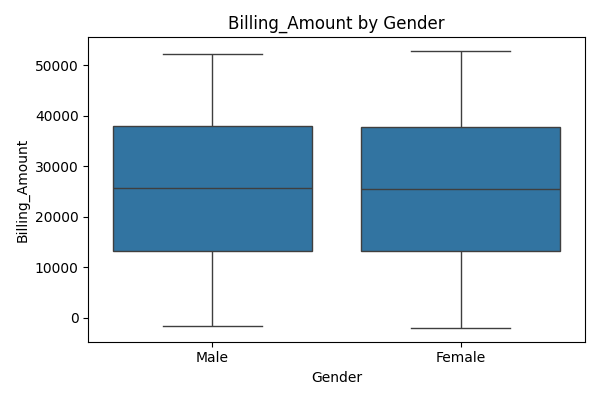

 boxplot_Billing_Amount_by_Insurance_Provider.png


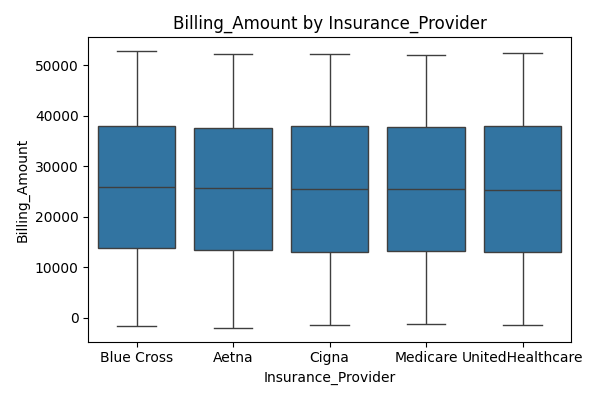

 boxplot_Billing_Amount_by_Medical_Condition.png


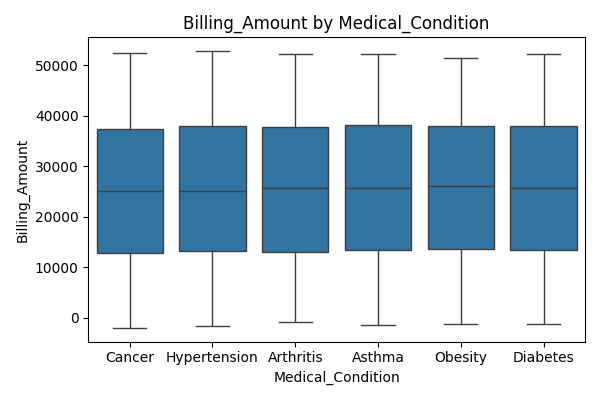

 boxplot_Billing_Amount_by_Medication.png


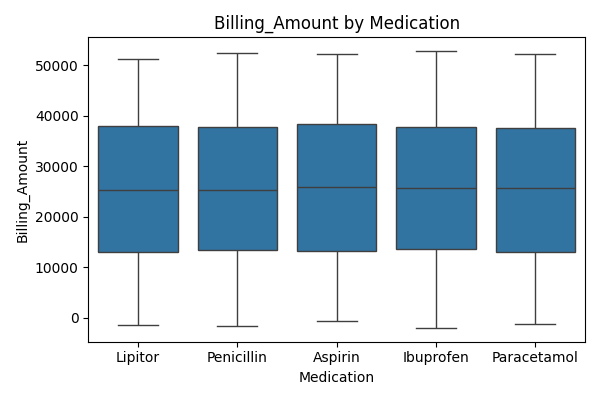

 boxplot_Billing_Amount_by_Test_Results.png


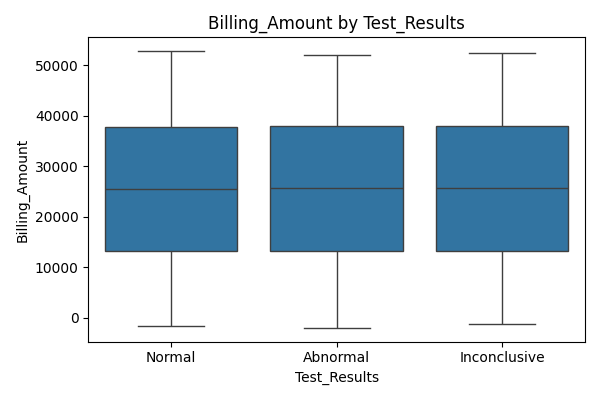

 boxplot_Days_Hospitalised_by_Admission_Type.png


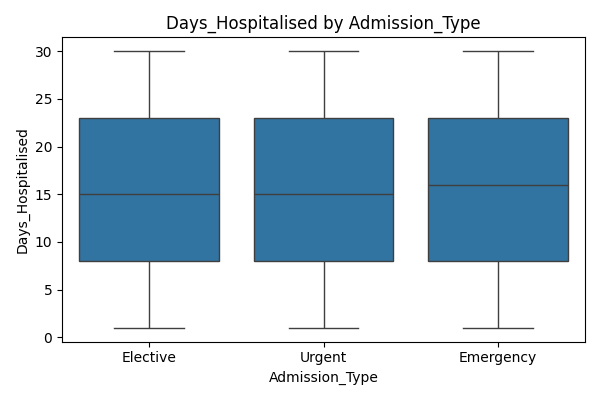

 boxplot_Days_Hospitalised_by_Blood_Type.png


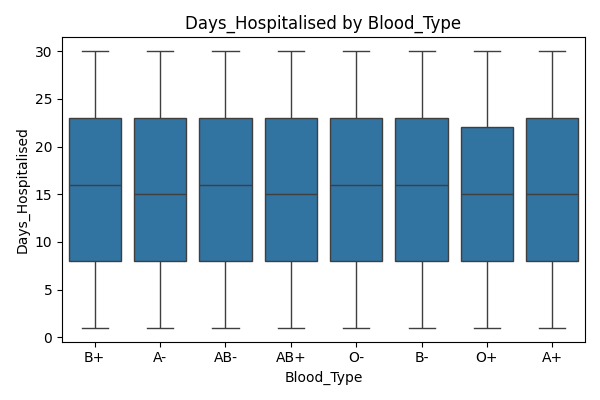

 boxplot_Days_Hospitalised_by_Ethnicity.png


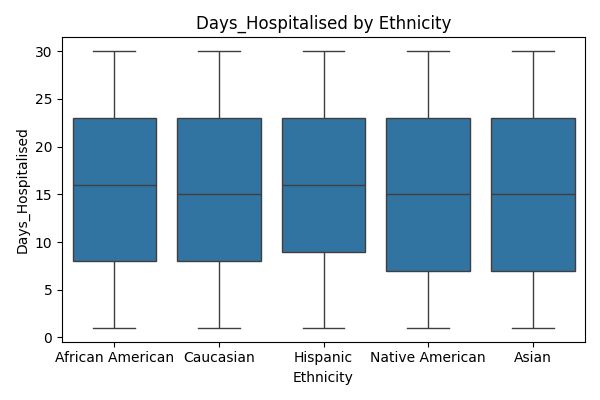

 boxplot_Days_Hospitalised_by_Gender.png


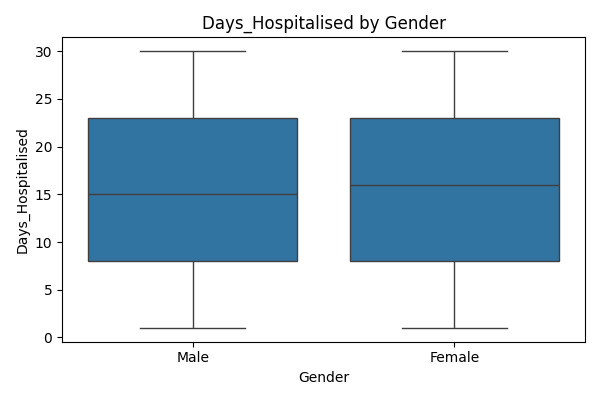

 boxplot_Days_Hospitalised_by_Insurance_Provider.png


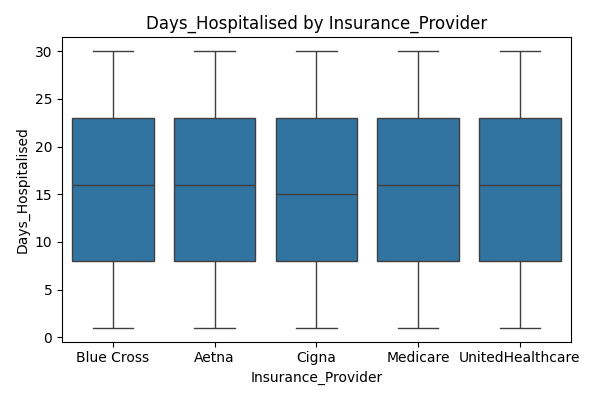

 boxplot_Days_Hospitalised_by_Medical_Condition.png


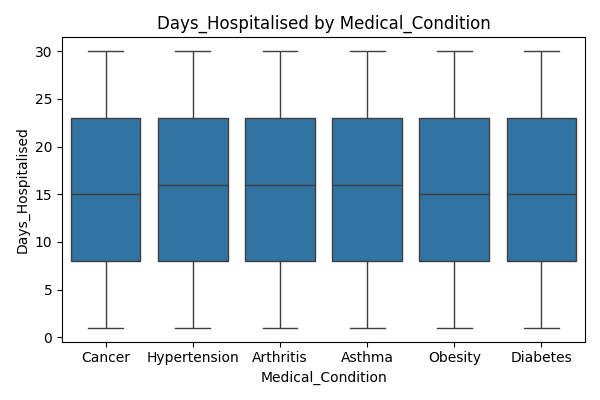

 boxplot_Days_Hospitalised_by_Medication.png


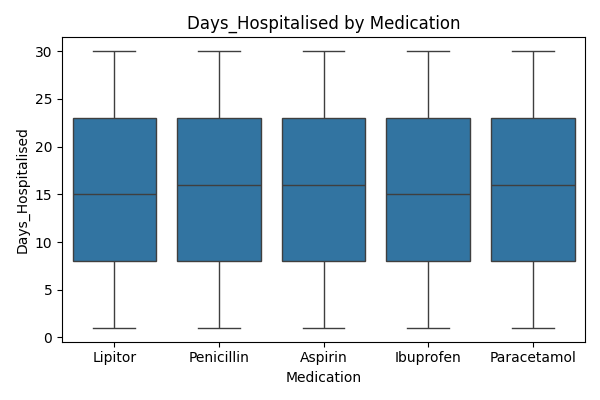

 boxplot_Days_Hospitalised_by_Test_Results.png


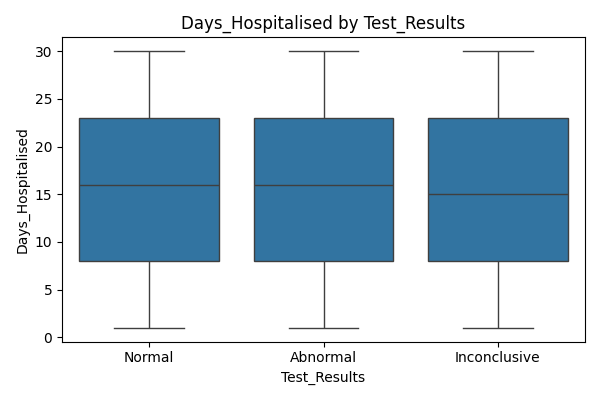

 boxplot_Height_by_Admission_Type.png


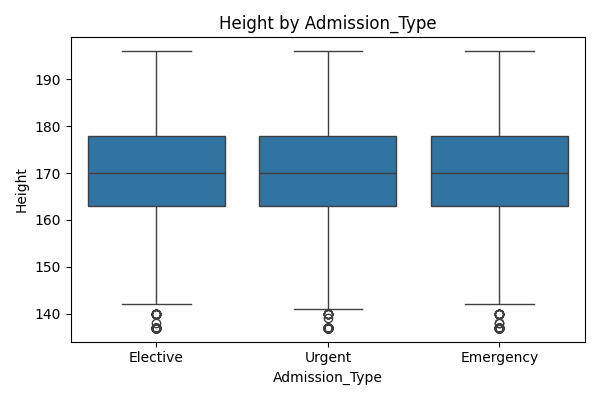

 boxplot_Height_by_Blood_Type.png


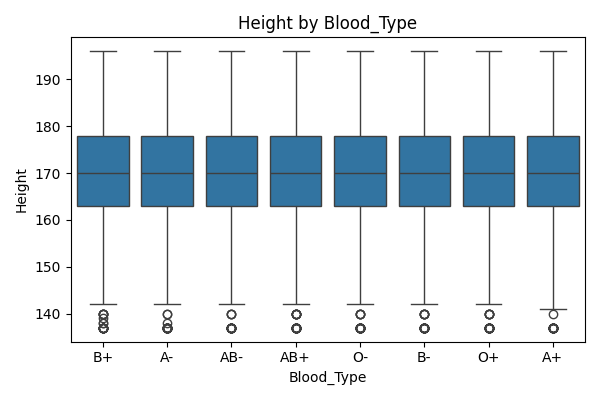

 boxplot_Height_by_Ethnicity.png


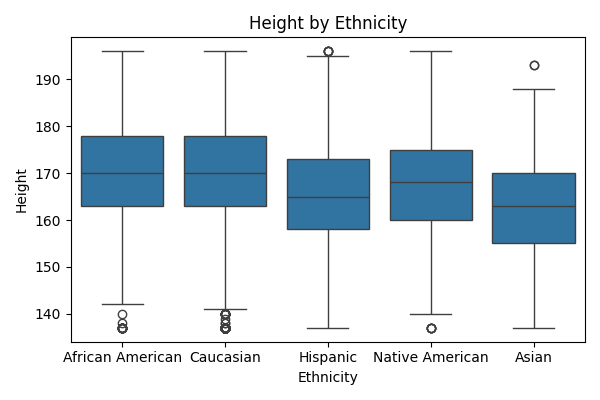

 boxplot_Height_by_Gender.png


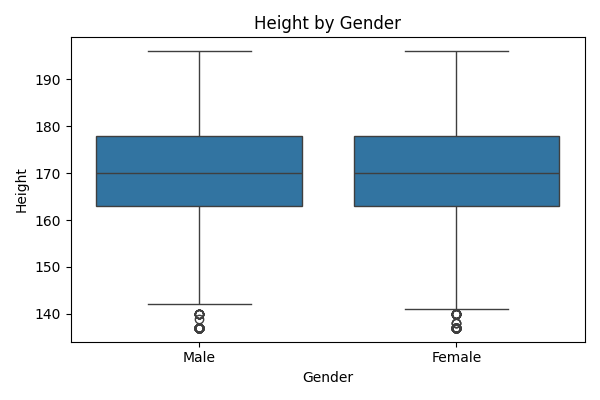

 boxplot_Height_by_Insurance_Provider.png


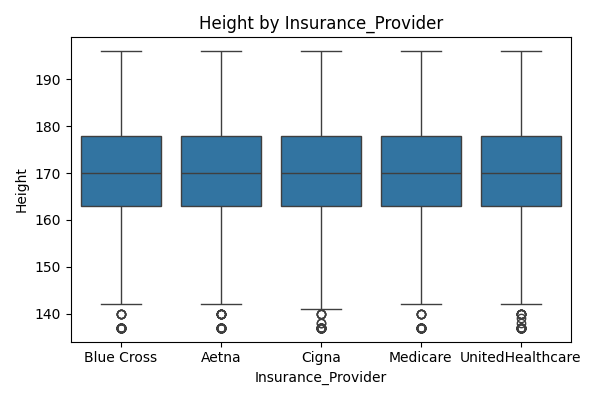

 boxplot_Height_by_Medical_Condition.png


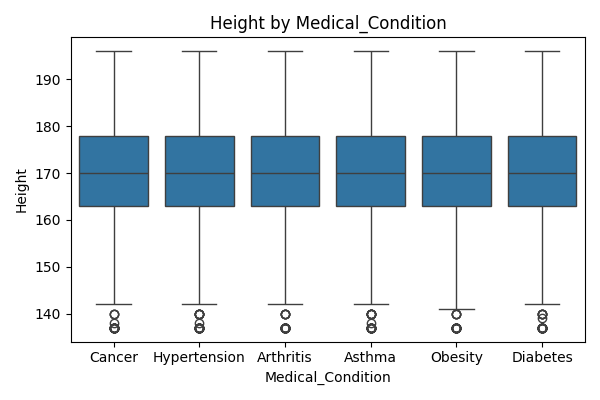

 boxplot_Height_by_Medication.png


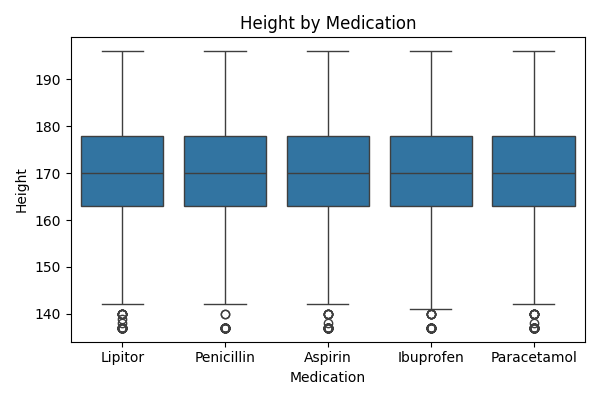

 boxplot_Height_by_Test_Results.png


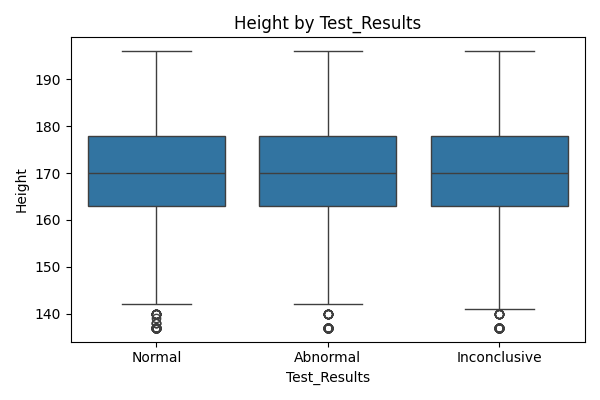

 boxplot_Room_Number_by_Admission_Type.png


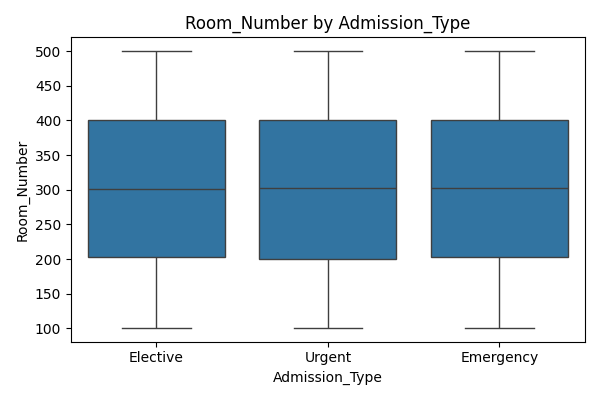

 boxplot_Room_Number_by_Blood_Type.png


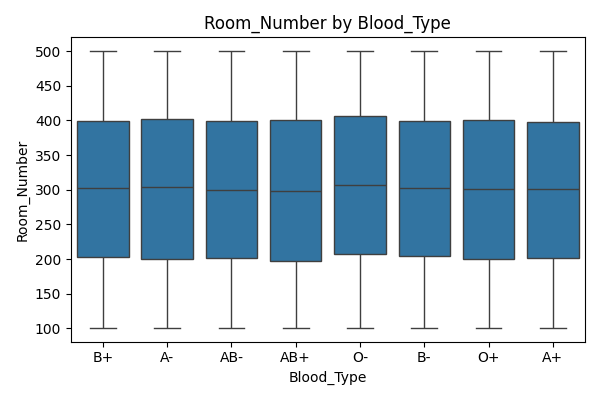

 boxplot_Room_Number_by_Ethnicity.png


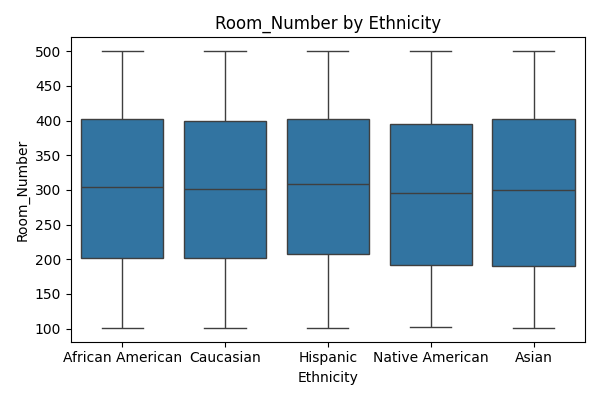

 boxplot_Room_Number_by_Gender.png


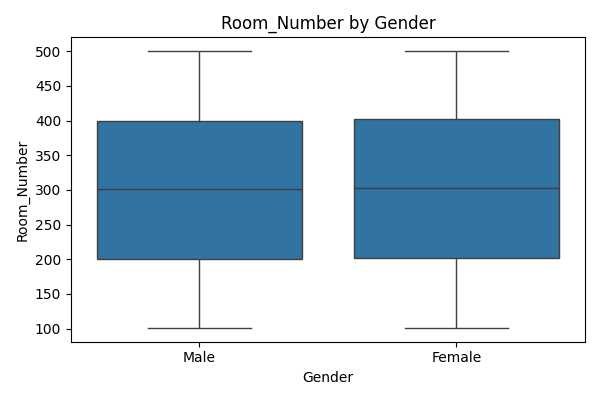

 boxplot_Room_Number_by_Insurance_Provider.png


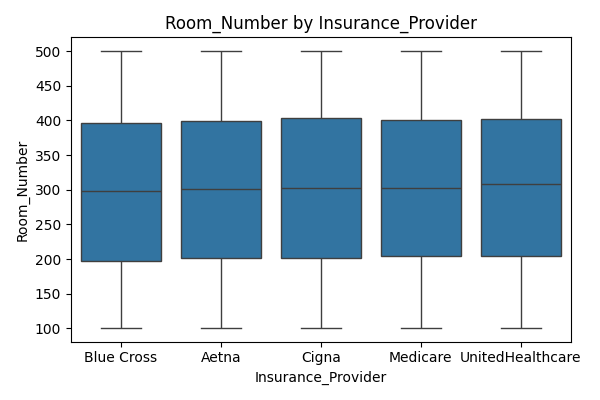

 boxplot_Room_Number_by_Medical_Condition.png


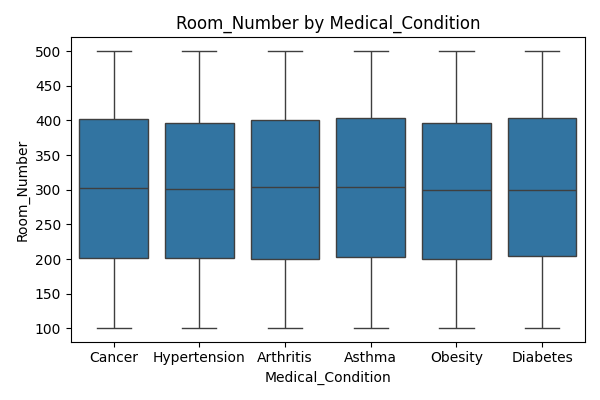

 boxplot_Room_Number_by_Medication.png


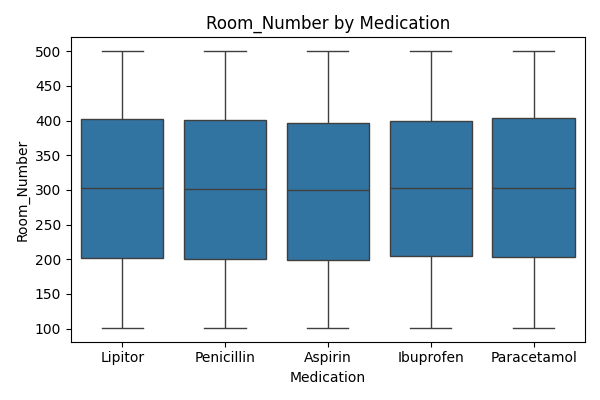

 boxplot_Room_Number_by_Test_Results.png


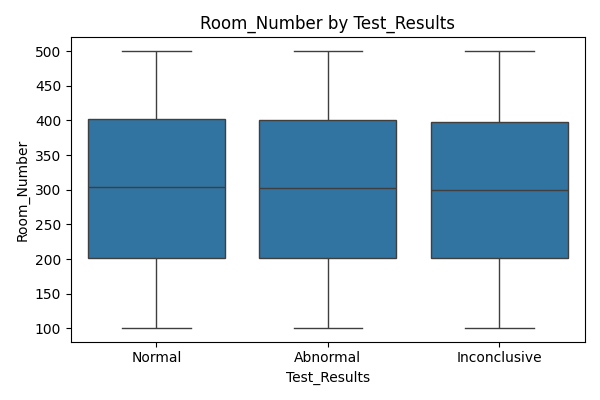

 boxplot_Weight_by_Admission_Type.png


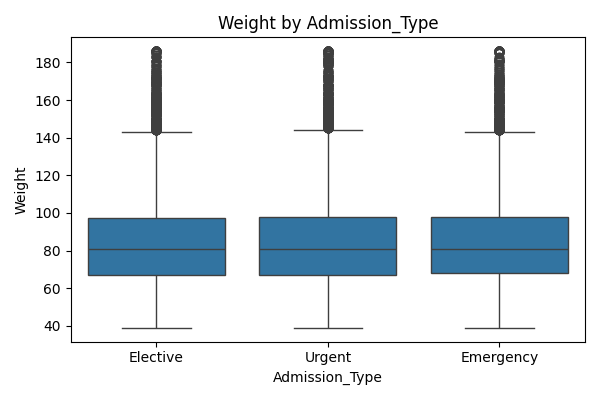

 boxplot_Weight_by_Blood_Type.png


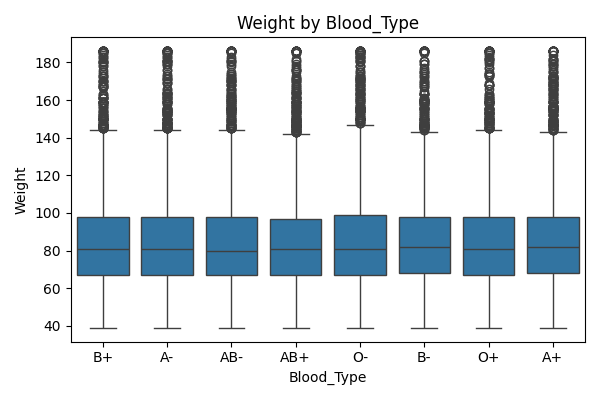

 boxplot_Weight_by_Ethnicity.png


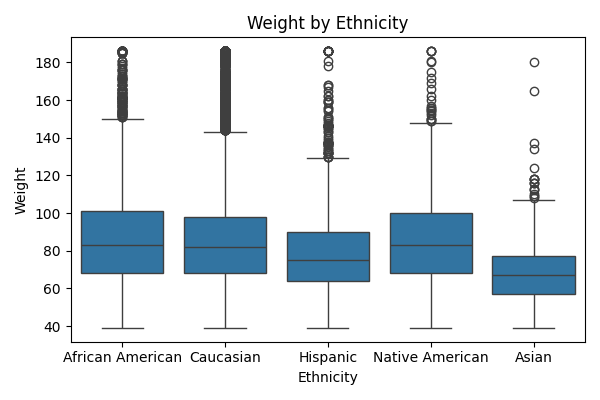

 boxplot_Weight_by_Gender.png


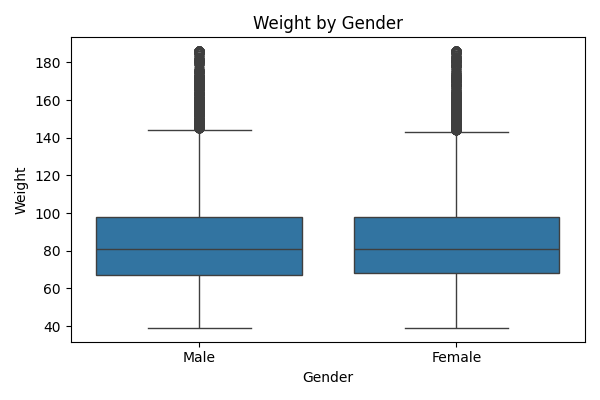

 boxplot_Weight_by_Insurance_Provider.png


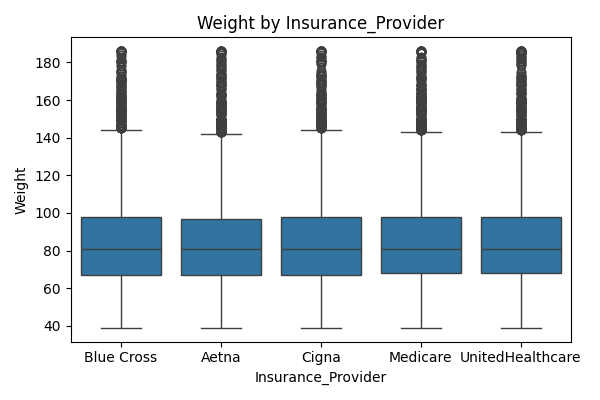

 boxplot_Weight_by_Medical_Condition.png


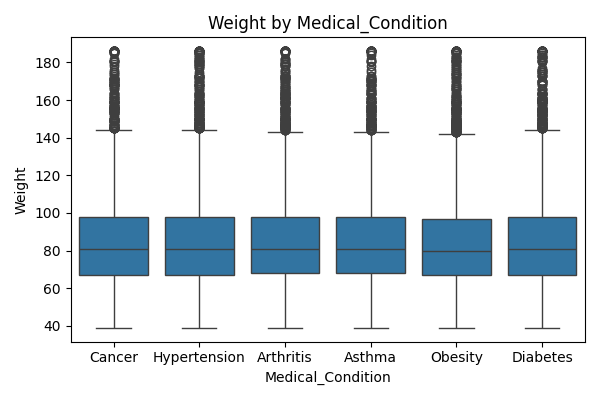

 boxplot_Weight_by_Medication.png


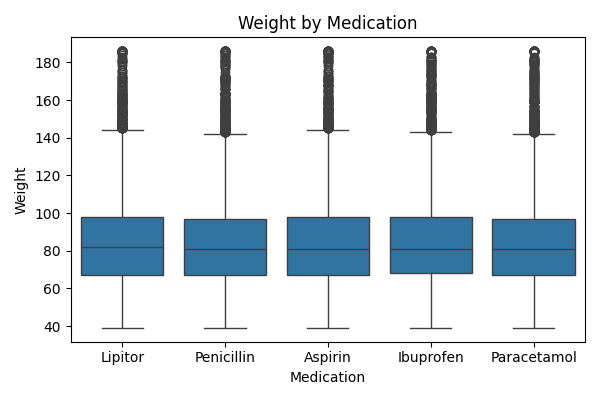

 boxplot_Weight_by_Test_Results.png


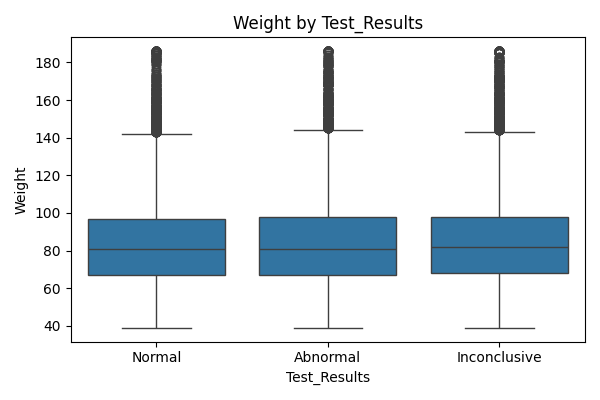

 correlation_heatmap.png


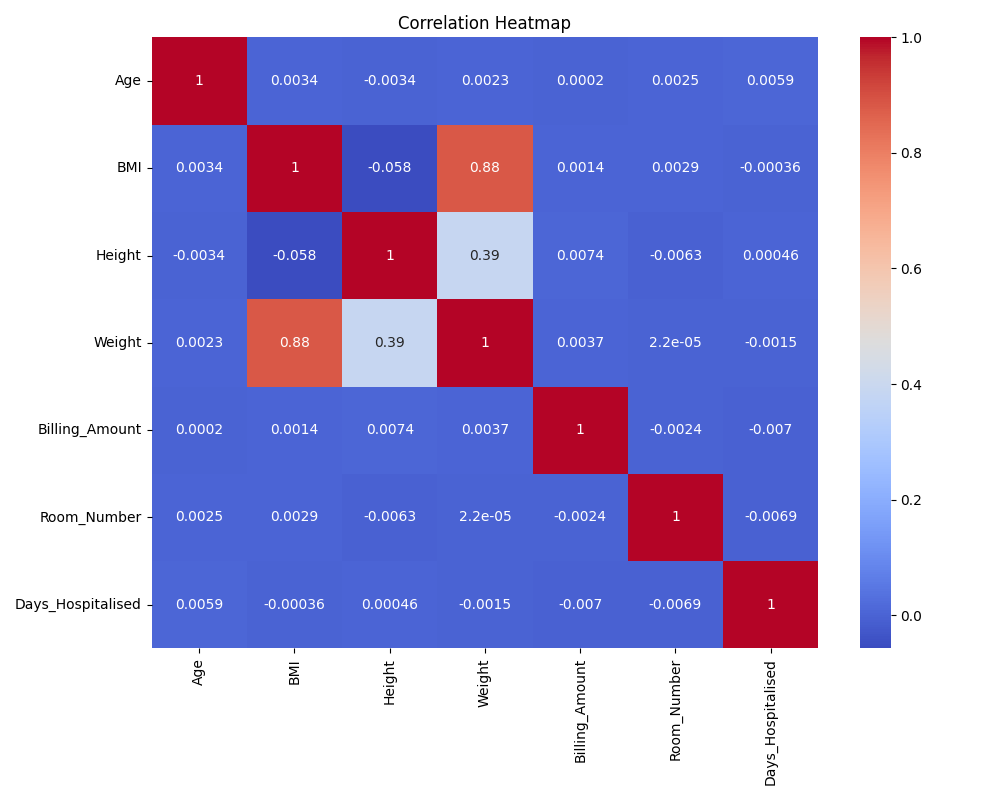

 pairplot.png


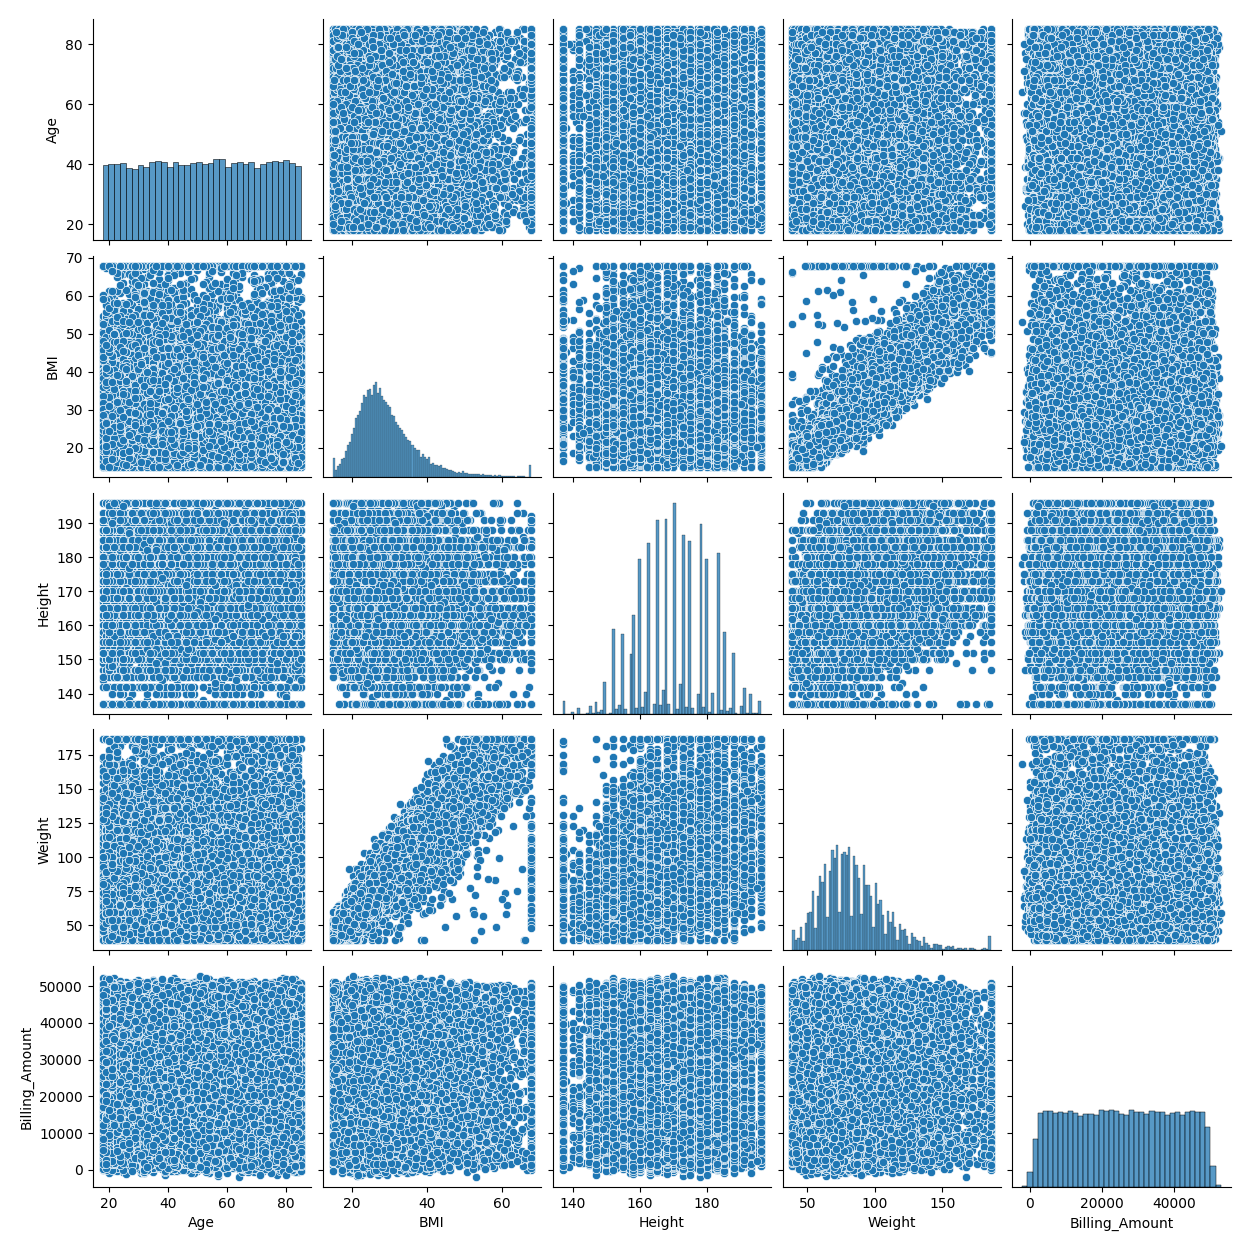

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import display, Image

#  Optional: Show plots inline in notebooks
%matplotlib inline

#  Create output folder
def create_output_folder(folder_name="eda_report"):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    return folder_name

#  Save summary statistics
def save_summary_stats(df, folder):
    df.info(buf=open(f"{folder}/info.txt", "w"))
    df.describe().to_csv(f"{folder}/describe.csv")
    df.isnull().sum().to_csv(f"{folder}/null_counts.csv")

#  Auto-generate visualizations
def generate_visualizations(df, folder):
    for col in df.columns:
        plt.figure(figsize=(6, 4))
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col].dropna(), kde=True)
            plt.title(f"Distribution of {col}")
        elif isinstance(df[col].dtype, pd.CategoricalDtype) or df[col].nunique() < 20:
            sns.countplot(x=col, data=df)
            plt.title(f"Count Plot of {col}")
        else:
            continue
        plt.tight_layout()
        plt.savefig(f"{folder}/{col}_plot.png")
        plt.show()
        plt.close()

#  Correlation heatmap
def plot_correlation_heatmap(df, folder):
    numeric_df = df.select_dtypes(include=np.number)
    if numeric_df.shape[1] >= 2:
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.savefig(f"{folder}/correlation_heatmap.png")
        plt.show()
        plt.close()

#  Boxplots for numeric vs categorical
def plot_boxplots(df, folder):
    numeric_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns
    for num in numeric_cols:
        for cat in cat_cols:
            if df[cat].nunique() < 10:
                plt.figure(figsize=(6, 4))
                sns.boxplot(x=cat, y=num, data=df)
                plt.title(f"{num} by {cat}")
                plt.tight_layout()
                plt.savefig(f"{folder}/boxplot_{num}_by_{cat}.png")
                plt.show()
                plt.close()

#  Pairplot for numeric features
def plot_pairplot(df, folder):
    numeric_df = df.select_dtypes(include=np.number)
    if numeric_df.shape[1] >= 2:
        sampled = numeric_df.iloc[:, :5]  # limit to 5 features
        sns.pairplot(sampled.dropna())
        plt.savefig(f"{folder}/pairplot.png")
        plt.show()
        plt.close()

#  Preview all saved plots
def preview_all_plots(folder="eda_report"):
    for file in sorted(os.listdir(folder)):
        if file.endswith(".png"):
            print(f" {file}")
            display(Image(filename=os.path.join(folder, file)))

#  Main function
def run_eda_pipeline(file_path):
    print(f" Loading dataset from: {file_path}")
    df = pd.read_csv(file_path)
    folder = create_output_folder()
    print(" Saving summary statistics...")
    save_summary_stats(df, folder)
    print(" Generating visualizations...")
    generate_visualizations(df, folder)
    print(" Creating correlation heatmap...")
    plot_correlation_heatmap(df, folder)
    print(" Creating boxplots...")
    plot_boxplots(df, folder)
    print(" Creating pairplot...")
    plot_pairplot(df, folder)
    print(f" EDA report saved in '{folder}' folder.")
    preview_all_plots(folder)

#  Example usage
run_eda_pipeline("/content/hospital.csv")


8. AI API Performance Benchmarking Design a benchmarking suite that: - Compares at least two AI APIs (e.g., Hugging Face, Ollama) - Measures latency, throughput, and accuracy - Reports hardware usage statistics during execution

             latency  throughput  accuracy    cpu  memory
HuggingFace      0.2        3.32      0.67  61.67   30.58
Ollama           0.4        2.00      0.67  50.83   30.73


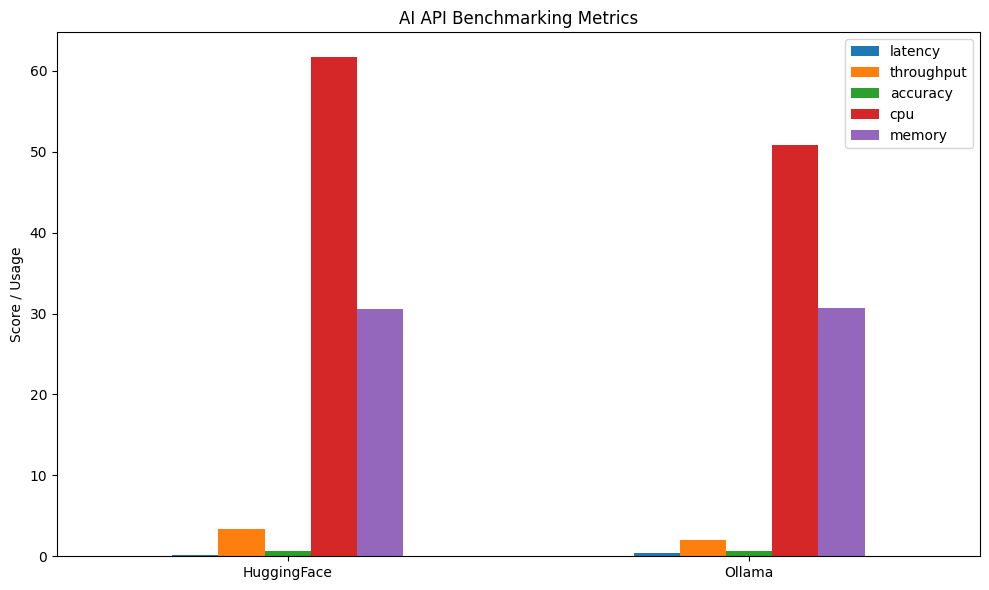

In [40]:
import time
import random
import psutil
import pandas as pd
import matplotlib.pyplot as plt

#  Simulated API 1: Hugging Face-style sentiment classifier
def huggingface_api(text):
    time.sleep(0.2)  # Simulate latency
    return "positive" if "love" in text or "great" in text else "negative"

#  Simulated API 2: Ollama-style sentiment classifier
def ollama_api(text):
    time.sleep(0.4)  # Simulate longer latency
    return "positive" if "excellent" in text or "fast" in text else "negative"

#  Benchmarking function
def benchmark_api(api_func, test_data):
    latencies = []
    correct = 0
    cpu_usages = []
    mem_usages = []

    start_time = time.time()

    for item in test_data:
        text = item["text"]
        expected = item["label"]

        cpu_usages.append(psutil.cpu_percent(interval=0.1))
        mem_usages.append(psutil.virtual_memory().percent)

        t0 = time.time()
        prediction = api_func(text)
        t1 = time.time()

        latencies.append(t1 - t0)
        if prediction == expected:
            correct += 1

    end_time = time.time()
    total_time = end_time - start_time
    throughput = len(test_data) / total_time
    avg_latency = sum(latencies) / len(latencies)
    accuracy = correct / len(test_data)

    return {
        "latency": round(avg_latency, 3),
        "throughput": round(throughput, 2),
        "accuracy": round(accuracy, 2),
        "cpu": round(sum(cpu_usages) / len(cpu_usages), 2),
        "memory": round(sum(mem_usages) / len(mem_usages), 2)
    }

# Sample test data
test_data = [
    {"text": "I love this product", "label": "positive"},
    {"text": "This was a terrible experience", "label": "negative"},
    {"text": "Excellent service and fast delivery", "label": "positive"},
    {"text": "Not worth the price", "label": "negative"},
    {"text": "Great quality and packaging", "label": "positive"},
    {"text": "Slow response and bad support", "label": "negative"}
]

# Run benchmarks
hf_results = benchmark_api(huggingface_api, test_data)
ollama_results = benchmark_api(ollama_api, test_data)

# Compile results
df = pd.DataFrame([hf_results, ollama_results], index=["HuggingFace", "Ollama"])
df.to_csv("benchmark_results.csv")
print(df)

# Plot comparison
df.plot(kind="bar", figsize=(10, 6), title="AI API Benchmarking Metrics")
plt.ylabel("Score / Usage")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("benchmark_metrics_plot.png")
plt.show()
